# __Analysis of economic impact on various aspects of life__

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
import random

%matplotlib inline
%matplotlib notebook

In [2]:
import io

## __Data preprocessing__

In [3]:
# for colab users

# from google.colab import files
# uploaded = files.upload()

In [4]:
# df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df = pd.read_csv('data_extended.csv')

# replace in column names all '.' to '_', it would simplify using pandas data frames
df.columns = df.columns.str.replace('.', '_')

In [5]:
df

country_code  year  BN_KLT_DINV_CD  BX_KLT_DINV_WD_GD_ZS  \
0             BEL  2014    1.374422e+10             -3.780938   
1             BLR  2000             NaN              0.932726   
2             BRB  2006   -2.977965e+08              7.952698   
3             CRI  2003             NaN              3.282795   
4             DEU  2003             NaN              1.234528   
...           ...   ...             ...                   ...   
2545          PRY  2001             NaN              1.098844   
2546          SLV  2010    2.255654e+08             -0.528336   
2547          TJK  2012   -1.982802e+08              2.597658   
2548          UKR  2008   -9.903000e+09              5.944695   
2549          ZAF  2007   -3.604680e+09              2.199885   

      BX_KLT_DINV_CD_WD  BM_KLT_DINV_GD_ZS  BN_TRF_KOGT_CD  BN_FIN_TOTL_CD  \
0         -2.009745e+10           4.921025   -5.307206e+08    5.648971e+09   
1          1.188000e+08                NaN             NaN             NaN   
2          3.422444e+08           1.032832             NaN   -2.235248e+08   
3          5.750649e+08                NaN             NaN             NaN   
4          3.093398e+10                NaN             NaN             NaN   
...                 ...                ...             ...             ...   
2545       8.420000e+07                NaN             NaN             NaN   
2546      -1.131607e+08           0.524807    2.320159e+08   -2.638895e+08   
2547       1.982802e+08                NaN    7.110520e+07   -8.098279e+07   
2548       1.070000e+10           0.442796    2.800000e+07   -1.222700e+10   
2549       6.586792e+09           0.995978    2.797462e+07   -1.582330e+10   

      BX_KLT_DREM_CD_DT  BN_RES_INCL_CD  ...  SL_TLF_TERT_ZS  SM_POP_TOTL_ZS  \
0                   NaN             NaN  ...            41.5             NaN   
1          4.600000e+06             NaN  ...             NaN       11.230245   
2                   NaN   -2.484290e+07  ...             NaN             NaN   
3          6.435034e+08             NaN  ...            15.5             NaN   
4                   NaN             NaN  ...            23.6             NaN   
...                 ...             ...  ...             ...             ...   
2545       8.855000e+07             NaN  ...             NaN             NaN   
2546       1.904872e+08   -2.974201e+08  ...            11.1        0.667803   
2547       3.303590e+07    7.516138e+07  ...             NaN             NaN   
2548       2.506000e+09   -3.025220e+09  ...             NaN             NaN   
2549       8.666024e+09    5.737275e+09  ...            13.4             NaN   

      SL_UEM_LTRM_ZS  SL_UEM_PRIM_ZS  SL_UEM_SECO_ZS  SL_UEM_TERT_ZS  \
0          49.900002       37.099998       40.200001       22.700001   
1                NaN        7.500000       14.600000       77.900002   
2          14.000000             NaN             NaN             NaN   
3                NaN       68.300003       19.299999        9.100000   
4          49.299999       26.000000       57.799999       12.000000   
...              ...             ...             ...             ...   
2545             NaN             NaN             NaN             NaN   
2546             NaN       47.700001       31.700001        9.800000   
2547             NaN             NaN             NaN             NaN   
2548             NaN        7.400000       52.900002       39.700001   
2549       22.000000       36.200001       56.299999        4.500000   

      SL_UEM_TOTL_NE_ZS       country  life_expectancy           gdp  
0              8.500000       Belgium             89.0  47439.396840  
1                   NaN       Belarus             68.0   1276.288340  
2              8.700000      Barbados             74.1  15646.559100  
3              6.600000    Costa Rica             78.0   4167.714170  
4              9.800000       Germany             78.5   3359.952150  
...                 ...           .

In [6]:
countries = df["country_code"].unique()

for co in countries:
    df.loc[df.country_code == co] =  df[df.country_code == co].interpolate(method='linear',
                                                               limit_direction = "both")
df = df.fillna(value=0)
df

country_code  year  BN_KLT_DINV_CD  BX_KLT_DINV_WD_GD_ZS  \
0             BEL  2014    1.374422e+10             -3.780938   
1             BLR  2000   -3.876900e+09              0.932726   
2             BRB  2006   -2.977965e+08              7.952698   
3             CRI  2003   -2.072325e+09              3.282795   
4             DEU  2003    8.982427e+10              1.234528   
...           ...   ...             ...                   ...   
2545          PRY  2001   -4.795000e+08              1.098844   
2546          SLV  2010    2.255654e+08             -0.528336   
2547          TJK  2012   -1.982802e+08              2.597658   
2548          UKR  2008   -9.903000e+09              5.944695   
2549          ZAF  2007   -3.604680e+09              2.199885   

      BX_KLT_DINV_CD_WD  BM_KLT_DINV_GD_ZS  BN_TRF_KOGT_CD  BN_FIN_TOTL_CD  \
0         -2.009745e+10           4.921025   -5.307206e+08    5.648971e+09   
1          1.188000e+08           0.210096    4.100000e+06   -4.014000e+09   
2          3.422444e+08           1.032832    0.000000e+00   -2.235248e+08   
3          5.750649e+08           0.019819    7.418910e+06   -2.827538e+09   
4          3.093398e+10           4.089300   -2.316051e+09    2.533880e+11   
...                 ...                ...             ...             ...   
2545       8.420000e+07           0.073951    5.100000e+07   -4.916166e+08   
2546      -1.131607e+08           0.524807    2.320159e+08   -2.638895e+08   
2547       1.982802e+08          -1.868887    7.110520e+07   -8.098279e+07   
2548       1.070000e+10           0.442796    2.800000e+07   -1.222700e+10   
2549       6.586792e+09           0.995978    2.797462e+07   -1.582330e+10   

      BX_KLT_DREM_CD_DT  BN_RES_INCL_CD  ...  SL_TLF_TERT_ZS  SM_POP_TOTL_ZS  \
0          0.000000e+00    6.968027e+09  ...       41.500000        8.574740   
1          4.600000e+06    1.550469e+09  ...       24.299999       11.230245   
2          0.000000e+00   -2.484290e+07  ...       18.400000        9.573998   
3          6.435034e+08   -3.059461e+08  ...       15.500000        7.921283   
4          0.000000e+00    1.233860e+09  ...       23.600000       13.155374   
...                 ...             ...  ...             ...             ...   
2545       8.855000e+07   -2.407089e+07  ...       18.400000        2.902600   
2546       1.904872e+08   -2.974201e+08  ...       11.100000        0.667803   
2547       3.303590e+07    7.516138e+07  ...       10.900000        4.502623   
2548       2.506000e+09   -3.025220e+09  ...       45.799999       11.239434   
2549       8.666024e+09    5.737275e+09  ...       13.400000        3.667696   

      SL_UEM_LTRM_ZS  SL_UEM_PRIM_ZS  SL_UEM_SECO_ZS  SL_UEM_TERT_ZS  \
0          49.900002       37.099998       40.200001       22.700001   
1           5.800000        7.500000       14.600000       77.900002   
2          14.000000       13.100000       71.900002        8.700000   
3          15.900000       68.300003       19.299999        9.100000   
4          49.299999       26.000000       57.799999       12.000000   
...              ...             ...             ...             ...   
2545       21.200001       44.299999       34.900002       19.600000   
2546        0.000000       47.700001       31.700001        9.800000   
2547       34.200001       21.000000       73.699997        5.400000   
2548       14.000000        7.400000       52.900002       39.700001   
2549       22.000000       36.200001       56.299999        4.500000   

      SL_UEM_TOTL_NE_ZS       country  life_expectancy           gdp  
0              8.500000       Belgium             89.0  47439.396840  
1              0.700000       Belarus             68.0   1276.288340  
2              8.700000      Barbados             74.1  15646.559100  
3              6.600000    Costa Rica             78.0   4167.714170  
4              9.800000       Germany             78.5   3359.952150  
...                 ...           .

In [7]:
# for colab users

# from google.colab import files
# uploaded = files.upload()

In [8]:
# series file constains full names of used indicators
data_path = 'series_extended.txt'

indicators_full_names = []
with open(data_path, 'rb') as f:
  lines = f.read().decode().split('\n')
  for line in lines:
    if line:
      indicators_full_names.append(line)

indicators_full_names.insert(0, 'Country Code')
indicators_full_names.insert(1, 'Year')
indicators_full_names.append('Country Name')
indicators_full_names.append('Life Expectancy')
indicators_full_names.append('GDP')

## __Helpers__

In [9]:
indicators_names_and_symbols = dict()
for it, column in enumerate(df.columns):
  indicators_names_and_symbols[column] = indicators_full_names[it]


def translate_symbol_to_name(column_name):
    """
    Convert indicator symbol to full name
    :param str culmn_name:
    :return str: 
    """
    result = indicators_names_and_symbols.get(column_name)
    return result

In [10]:
translate_symbol_to_name('SP_DYN_IMRT_IN')

'Mortality rate, infant (per 1,000 live births)'

In [11]:
def print_sorted_dict(dictionary, add_indices=False):
    """
    Print dictionary sorted by its values.
    Mainly for debug purposes
    :param str dictionary: dictionary to print
    :param bool add_indices: 
    :return:
    """
    for i,k in enumerate(dictionary, key=dictionary.get, reverse=True):
        if (add_indices):
            print(i + 1, k, dictionary[k])
        else:
            print(k, dictionary[k])

In [12]:
def mean_dict_generator(key):
    """
    Generate dictionary of mean values
    :param str key: indicator symbol
    :return dict: generated dictionary
    """
    # TODO check if value even exist in columns
    result = {}
    for country in df.country.unique():
        # some slices could contain only one NAN
        # we do not insert this record into result array
        # and we get rid of annoying RT errors
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            mean = np.nanmean(df[df.country == country][key])
            if (mean == mean):
                result[country] = int(round(mean, 1))
    return result      
    

## __Histograms__

In [ ]:
mean_life_expect = mean_dict_generator('life_expectancy')

plt.hist(mean_life_expect.values(), bins=10)
plt.title("Mean life expctancy histogram")
plt.xlabel('Life expectancy value in years')
plt.show()

In [ ]:
df[df['country_code'] == 'AFG']

In [ ]:
# TODO skip nan values

mean_gdp = mean_dict_generator('gdp')

plt.hist(mean_gdp.values(), bins=10)
plt.title("Mean GDP histogram")
plt.xlabel("Gross Domestic Product per capita (in USD)")
plt.show()

In [ ]:
years = ['2005', '2015']
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=10)

X_05 = np.array(df[df['year'] == 2005]['life_expectancy'])
X_15 = np.array(df[df['year'] == 2015]['life_expectancy'])

X_05 = X_05[~np.isnan(X_05)]
X_15 = X_15[~np.isnan(X_15)]

plt.hist(X_05, **kwargs)
plt.hist(X_15, **kwargs)
plt.legend(years)
plt.title("Copmarision of life expectancy in 2005 and 2015")
plt.xlabel('Life expectancy value in years')
plt.show()

In [ ]:
# TODO clean NANs
years = ['2005', '2015']
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=8)

X_05 = np.array(df[df['year'] == 2005]['gdp'])
X_15 = np.array(df[df['year'] == 2015]['gdp'])

# skip NANs
X_05 = X_05[~np.isnan(X_05)]
X_15 = X_15[~np.isnan(X_15)]

plt.hist(X_05, **kwargs)
plt.hist(X_15, **kwargs)

plt.legend(years)
plt.title("Copmarision of GDP in 2005 and 2015")
plt.xlabel("Gross Domestic Product per capita (in USD)")
plt.show()

## __PCA analysis__

In [ ]:
year = 2010
data_from_year = df[df['year'] == year]
countries = list(data_from_year['country_code'])

# data contatins only columns with indicators
data = data_from_year.drop(['country', 'country_code', 'year', 'SP_URB_TOTL'], axis=1)

In [ ]:
# replace NaN with mean values
# in data there should not be any NaN values...
data.fillna(data.mean(), inplace=True)

In [ ]:
data

In [ ]:
# standarize data
# have no idea why it warn about NaN values if data do not have any NaN...
data_scaled = preprocessing.scale(data)

In [ ]:
data_scaled.shape

In [ ]:
columns_to_delete = []
for i, entry in enumerate(data_scaled.std(axis=0)):
    if np.isnan(entry):
        columns_to_delete.append(i)
columns_to_delete

In [ ]:
# delete this columns which are NaN
data_scaled = np.delete(data_scaled, columns_to_delete, axis=1)
data_scaled.shape

In [ ]:
indicators = list(data.columns)

for index in columns_to_delete:
    del indicators[index]

# it should be correct
len(indicators)

In [ ]:
# if this failes, something is wrong or above cells were run too many times
assert len(indicators) == data_scaled.shape[1]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(data_scaled)
X_pca.shape

In [ ]:
sample_indicators = np.random.choice(indicators, 5, replace=False)
print(sample_indicators)

In [ ]:
plt.figure(figsize=(10,10))

x = X_pca[:, 0]
y = X_pca[:, 1]

plt.scatter(x, y, c="red", s=20, edgecolor='k')

for i, country in enumerate(countries):
    plt.annotate(country, (x[i], y[i]), ha='center', size=20)

plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

In [ ]:
variance = pca.explained_variance_ratio_
plt.plot(variance, 'ro')
plt.show()
print(sum(variance[0:2]))

In [ ]:
k = 15
pc1 = pca.components_[0]
sorted = list(np.argsort(pc1))
print('----------PC1-------------')
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc1[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc1[sorted[i]]))

pc2 = pca.components_[1]
sorted = list(np.argsort(pc2))
print('----------PC2-------------')
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc2[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc2[sorted[i]]))

In [ ]:
k = 15
pc1 = pca.components_[0]
sorted = list(np.argsort(pc1))
print('----------PC1-------------')
for i in range(0, k): 
    print(indicators[sorted[i]] + ':' + repr(pc1[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k):
    print(indicators[sorted[i]] + ':' + repr(pc1[sorted[i]]))
pc2 = pca.components_[1]
sorted = list(np.argsort(pc2))
print('----------PC2-------------')
for i in range(0, k): 
    print(indicators[sorted[i]] + ':' + repr(pc2[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(indicators[sorted[i]] + ':' + repr(pc2[sorted[i]]))

## __PCA analysis using less indicators from each sector__

In [ ]:
year = 2010
data_from_year = df[df['year'] == year]
countries = list(data_from_year['country_code'])

# data contatins only columns with indicators
data = data_from_year.drop(['country', 'country_code', 'year', 'SP_URB_TOTL'], axis=1)

In [ ]:
indicators_list = list(data.columns)

sector_names = []
for entry in indicators_list:
    if entry.split('_')[0] not in sector_names:
        sector_names.append(entry.split('_')[0])

# quick fix life_expectancy param
for i, sector_name in enumerate(sector_names):
    if sector_name == 'life':
        sector_names[i] = 'life_expectancy'
        
print('There are %s sectors' %len(sector_names))

In [ ]:
from random import randrange

# now we need to select only one idicator from each sector
# list of column names selected for analysis
selected_indicators = []

for sector_name in sector_names:
    tmp_list = []
    for column_name in data.columns:
        # sector_name[:2] required for life_expectancy and gdp params only
        if column_name[:2] == sector_name[:2]:
            tmp_list.append(column_name)
    # rand one of column from tmp_list and add it to selected_indicators
    if len(tmp_list):
        selected_indicators.append(tmp_list[randrange(len(tmp_list))])

In [ ]:
assert len(selected_indicators) == len(sector_names)

In [ ]:
data = data[selected_indicators]

# replace NaN with mean values
# in data there should not be any NaN values...
data.fillna(data.mean(), inplace=True)

In [ ]:
data 

In [ ]:
# standarize data
# have no idea why it warn about NaN values if data do not have any NaN...
data_scaled = preprocessing.scale(data)

In [ ]:
data_scaled.shape

In [ ]:
# delete columns containing nasns
columns_to_delete = []
for i, entry in enumerate(data_scaled.std(axis=0)):
    if np.isnan(entry):
        columns_to_delete.append(i)

data_scaled = np.delete(data_scaled, columns_to_delete, axis=1)
data_scaled.shape

indicators = list(data.columns)

for index in columns_to_delete:
    del indicators[index]

# it should be correct
len(indicators)

In [ ]:
# if this failes, something is wrong or above cells were run too many times
assert len(indicators) == data_scaled.shape[1]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(data_scaled)
X_pca.shape

In [ ]:
plt.figure(figsize=(10,10))

x = X_pca[:, 0]
y = X_pca[:, 1]

plt.scatter(x, y, c="red", s=20, edgecolor='k')

for i, country in enumerate(countries):
    plt.annotate(country, (x[i], y[i]), ha='center', size=20)

plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

In [ ]:
variance = pca.explained_variance_ratio_
plt.plot(variance, 'ro')
plt.show()
print(sum(variance[0:2]))

In [ ]:
k = 15
pc1 = pca.components_[0]
sorted = list(np.argsort(pc1))
print('----------PC1-------------')
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc1[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc1[sorted[i]]))

pc2 = pca.components_[1]
sorted = list(np.argsort(pc2))
print('----------PC2-------------')
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc2[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(translate_symbol_to_name(indicators[sorted[i]]) + ':' + repr(pc2[sorted[i]]))

In [ ]:
k = 15
pc1 = pca.components_[0]
sorted = list(np.argsort(pc1))
print('----------PC1-------------')
for i in range(0, k): 
    print(indicators[sorted[i]] + ':' + repr(pc1[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k):
    print(indicators[sorted[i]] + ':' + repr(pc1[sorted[i]]))
pc2 = pca.components_[1]
sorted = list(np.argsort(pc2))
print('----------PC2-------------')
for i in range(0, k): 
    print(indicators[sorted[i]] + ':' + repr(pc2[sorted[i]]))
print('--------------------------')
sorted.reverse()
for i in range(0, k): 
    print(indicators[sorted[i]] + ':' + repr(pc2[sorted[i]]))

In [ ]:
def myplot(score,coeff,labels=None):
    plt.figure(figsize=(10,10))
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

print(pca.components_[0:2, :])

indicators_full_name_list = []
for ind in indicators:
    indicators_full_name_list.append(translate_symbol_to_name(ind))

myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]), indicators_full_name_list)
axes = plt.gca()
axes.set_ylim([-1.0,1.0])
plt.show()

## __Unemployment analysis__

In [ ]:
df2=pd.read_csv('unemployment.csv')
df2.head(5)

In [ ]:
non_country_list=['Arab World','Central Europe and the Baltics','Caribbean small states','East Asia & Pacific (excluding high income)',
                 'Early-demographic dividend', 'East Asia & Pacific','Europe & Central Asia (excluding high income)',
                 'Europe & Central Asia','Euro area','European Union','Fragile and conflict affected situations','High income',
                 'Heavily indebted poor countries (HIPC)','IBRD only', 'IDA & IBRD total', 'IDA total','IDA blend','IDA only',
                 'Latin America & Caribbean (excluding high income)','Latin America & Caribbean','Least developed countries: UN classification', 
                 'Low income','Lower middle income', 'Low & middle income','Late-demographic dividend','Middle East & North Africa',
                 'Middle income','Middle East & North Africa (excluding high income)','North America','OECD members','Other small states',
                 'Pre-demographic dividend','Post-demographic dividend','South Asia','Sub-Saharan Africa (excluding high income)',
                 'Sub-Saharan Africa','Small states','East Asia & Pacific (IDA & IBRD countries)',
                 'Europe & Central Asia (IDA & IBRD countries)','Latin America & the Caribbean (IDA & IBRD countries)',
                 'Middle East & North Africa (IDA & IBRD countries)','South Asia (IDA & IBRD)',
                 'Sub-Saharan Africa (IDA & IBRD countries)','Upper middle income','World']

In [ ]:
df_non_country=df2[df2['Country Name'].isin(non_country_list)]
df_non_country

In [ ]:
df_country=df2[~df2['Country Name'].isin(non_country_list)]
df_country

In [ ]:
df_world = df2[df2['Country Name'] == 'World']

x = list(df_world.columns[-5:])
y = list(df_world.iloc[0,-5:])

plt.title("World unemployment rates (% of total labor force ages 15-24)")
plt.plot(x,y)
plt.ylabel("unemployment rate [%]")
plt.xlabel("year")
plt.show()

In [ ]:
df_region = df2[
    (df2['Country Name'] == 'Europe & Central Asia') | 
    (df2['Country Name'] == 'North America') |
    (df2['Country Name'] == 'Latin America & Caribbean') |
    (df2['Country Name'] == 'South Asia') |
    (df2['Country Name'] == 'Middle East & North Africa') |
    (df2['Country Name'] == 'East Asia & Pacific') |
    (df2['Country Name'] == 'Central Europe and the Baltics') |
    (df2['Country Name'] == 'East Asia & Pacific')
]

x = list(df_region.columns[-5:])
plt.figure(figsize=(8,8))
plt.plot(x, list(df_region.iloc[0, -5:]))
plt.plot(x, list(df_region.iloc[1, -5:]))
plt.plot(x, list(df_region.iloc[2, -5:]))
plt.plot(x, list(df_region.iloc[3, -5:]))
plt.plot(x, list(df_region.iloc[4, -5:]))
plt.plot(x, list(df_region.iloc[5, -5:]))
plt.plot(x, list(df_region.iloc[6, -5:]))
plt.title("World regions unemployment rates (% of total labor force ages 15-24)")

plt.legend(list(df_region['Country Name'].unique()))
plt.ylabel("unemployment rate [%]")
plt.xlabel("year")
plt.show()

In [ ]:
df = pd.read_csv('data_extended.csv')

# replace in column names all '.' to '_', it would simplify using pandas data frames
df.columns = df.columns.str.replace('.', '_')

unemployment_ind_codes = ['SL_UEM_LTRM_ZS', 'SL_UEM_PRIM_ZS', 'SL_UEM_SECO_ZS', 'SL_UEM_TERT_ZS' , 'SL_UEM_TOTL_NE_ZS']
unempl_df = df[['country_code', 'year', *unemployment_ind_codes, 'gdp']]
unempl_df = unempl_df[(unempl_df['year'] == 2010) | 
                      (unempl_df['year'] == 2011) |
                      (unempl_df['year'] == 2012) |
                      (unempl_df['year'] == 2013) | 
                      (unempl_df['year'] == 2014) 
                     ]
unempl_df

In [ ]:
# merged_df = pd.DataFrame(columns = ['Country', 'GDP_2011', 'GDP_2014', dGDP, 'Unemployment_2011', 'Unemployment_2014', dUnemployment]) 
l = []
for country in countries:
    # check if country in 2nd table
    if country in list(df2['Country Code'].unique()):
        gdp_val2014 = unempl_df[(unempl_df['year'] == 2014) & (unempl_df['country_code'] == country)]['gdp']
        gdp_val2011 = unempl_df[(unempl_df['year'] == 2010) & (unempl_df['country_code'] == country)]['gdp']
        print(gdp_val2014.item(), gdp_val2011.item())
        
        unemp_val2014 = df2[df2['Country Code'] == country]['2014']
        unemp_val2011 = df2[df2['Country Code'] == country]['2011']
        if ~np.isnan(gdp_val2014.item()) \
            and ~np.isnan(gdp_val2011.item()) \
            and ~np.isnan(unemp_val2014.item()) \
            and ~np.isnan(unemp_val2011.item()):
            
#             print(country, int(gdp_val2014), int(unemp_val2014))
            tmp = {'Country': country, 'GDP_2011': gdp_val2011.item(), 'GDP_2014': gdp_val2014.item(), 'dGDP': gdp_val2014.item() - gdp_val2011.item(),'Unemployment_2011':  unemp_val2011.item(), 'Unemployment_2014': unemp_val2014.item(), 'dUnemployment': unemp_val2014.item() - unemp_val2011.item()}
            l.append(tmp)
            
            
merged_df = pd.DataFrame(l)

In [ ]:
merged_df = merged_df.sort_values('dGDP')
merged_df

In [ ]:
x = list(merged_df['Country'])[2:30] + list(merged_df['Country'])[100:-2]

y_gdp = list(merged_df['dGDP'])[2:30] + list(merged_df['dGDP'])[100:-2]
y_unemployment = list(merged_df['dUnemployment'])[2:30] + list(merged_df['dUnemployment'])[100:-2]


fig, ax1 = plt.subplots(figsize=(10,10))
color = 'tab:red'
ax1.set_xlabel('countries')
ax1.set_ylabel('Δ of GDP in years 2011-2014', color=color)

ax1.plot(x, y_gdp, color=color)
ax1.tick_params(axis='y', labelcolor=color, )
ax1.tick_params(axis='x', rotation=90, labelsize=8, labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Δ of unemployment in years 2011-2014', color=color)
ax2.plot(x, y_unemployment, color=color)
ax2.tick_params(axis='y', labelcolor=color, pad=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [ ]:
# --
# countries = df["countryCode"].unique()

# for co in countries:
#     df.loc[df.countryCode == co] =  df[df.countryCode == co].interpolate(method='linear',
#                                                                limit_direction = "both")
# df = df.fillna(value=0)
# df
# --
merged_df.shape

In [ ]:
sorted_merged = merged_df[['Country','GDP_2014']].sort_values('GDP_2014')

In [ ]:
countries_to_analysis = sorted_merged['Country']
bottom = list(countries_to_analysis.head(20))
top = list(countries_to_analysis.tail(20))

In [ ]:
unempl_df

In [ ]:
translate_symbol_to_name('SL_UEM_TERT_ZS')

In [ ]:
top_primary_ed = 0
counter = 0
for country in top:
    tmp = unempl_df[(unempl_df['country_code'] == country) & (unempl_df['year'] == 2014)]['SL_UEM_PRIM_ZS']
    if ~np.isnan(tmp.item()):
        counter += 1
        top_primary_ed += tmp.item()

top_mean_prim = top_primary_ed / counter


top_sec_ed = 0
counter = 0
for country in top:
    tmp = unempl_df[(unempl_df['country_code'] == country) & (unempl_df['year'] == 2014)]['SL_UEM_SECO_ZS']
    if ~np.isnan(tmp.item()):
        counter += 1
        top_sec_ed += tmp.item()

top_mean_sec = top_sec_ed / counter
        

top_terr_ed = 0
counter = 0    
for country in top:
    tmp = unempl_df[(unempl_df['country_code'] == country) & (unempl_df['year'] == 2014)]['SL_UEM_TERT_ZS']
    if ~np.isnan(tmp.item()):
        counter += 1
        top_terr_ed += tmp.item()

top_mean_terr = top_terr_ed / counter

In [ ]:
bot_primary_ed = 0
counter = 0
for country in bottom:
    tmp = unempl_df[(unempl_df['country_code'] == country) & (unempl_df['year'] == 2014)]['SL_UEM_PRIM_ZS']
    if ~np.isnan(tmp.item()):
        counter += 1
        bot_primary_ed += tmp.item()

bot_mean_prim = bot_primary_ed / counter

bot_sec_ed = 0
counter = 0
for country in bottom:
    tmp = unempl_df[(unempl_df['country_code'] == country) & (unempl_df['year'] == 2014)]['SL_UEM_SECO_ZS']
    if ~np.isnan(tmp.item()):
        counter += 1
        bot_sec_ed += tmp.item()

bot_mean_sec = bot_sec_ed / counter


bot_terr_ed = 0
counter = 0    
for country in bottom:
    tmp = unempl_df[(unempl_df['country_code'] == country) & (unempl_df['year'] == 2014)]['SL_UEM_TERT_ZS']
    if ~np.isnan(tmp.item()):
        counter += 1
        bot_terr_ed += tmp.item()

bot_mean_terr = bot_terr_ed / counter

In [ ]:
print(bot_mean_prim)
print(bot_mean_terr)
print(bot_mean_sec)
print(top_mean_sec)
print(top_mean_prim)
print(top_mean_terr)

In [ ]:
df_rearanged = pd.DataFrame({
    'primary education' : [bot_mean_prim, top_mean_prim],
    'secondary education' : [bot_mean_sec, top_mean_sec],
    'tertiary education' : [bot_mean_terr, top_mean_terr]
    },index = ['low GDP', 'high GDP']
)
df_rearanged.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Comparison unemployment of 20 countries \n with the highest and the lowest GDP')
plt.ylabel('% of total unemployment')
plt.show()

## __Birth rate__

In [ ]:
# df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df = pd.read_csv('data_extended.csv')

# replace in column names all '.' to '_', it would simplify using pandas data frames
df.columns = df.columns.str.replace('.', '_')

countries = df["country_code"].unique()

for co in countries:
    df.loc[df.country_code == co] =  df[df.country_code == co].interpolate(method='linear',
                                                               limit_direction = "both")
df = df.fillna(value=0)
df

In [ ]:
df['year'].unique()


In [ ]:
df = df[['country_code', 'year', 'gdp', 'SP_DYN_LE00_IN', 'SP_DYN_CBRT_IN', 'SP_DYN_IMRT_IN']]

In [ ]:
df

In [ ]:
df = df[(df['year'] == 2000) | (df['year'] == 2015)]

In [ ]:
df

In [ ]:
df[(df['year'] == 2015) & (df['country_code'] == 'AUS')]

In [ ]:
# drop all NaN rows
df = df[(df['gdp'].notna()) & (df['SP_DYN_LE00_IN'].notna()) & (df['SP_DYN_CBRT_IN'].notna()) & (df['SP_DYN_IMRT_IN'].notna())]
df

In [ ]:
countries = df['country_code'].unique()
countries

In [ ]:
plt.hist(df[df['year'] == 2015]['gdp'], bins=20)
plt.title("GDP histogram")
plt.xlabel('GDP in $')
plt.show()

__Bins selected based on histogram:__

\> 40k <br>
25k - 40k <br>
15k - 25k <br>
5k - 15k <br>
0k - 5k <br>

In [ ]:
b_40_plus = list(df[(df['year'] == 2015) & (df['gdp'] > 40000)]['country_code'])
b_25_40 = list(df[(df['year'] == 2015) & (df['gdp'] <= 40000)& (df['gdp'] > 25000)]['country_code'])
b_15_25 = list(df[(df['year'] == 2015) & (df['gdp'] <= 25000)& (df['gdp'] > 15000)]['country_code'])
b_5_15 = list(df[(df['year'] == 2015) & (df['gdp'] <= 15000)& (df['gdp'] > 5000)]['country_code'])
b_1_5 = list(df[(df['year'] == 2015) & (df['gdp'] <= 5000)& (df['gdp'] > 1000)]['country_code'])
b_1_less = list(df[(df['year'] == 2015) & (df['gdp'] <= 1000)]['country_code'])

In [ ]:
print(random.choices(b_40_plus, k=5, ))
print(random.choices(b_25_40, k=5))
print(random.choices(b_15_25, k=5))
print(random.choices(b_5_15, k=5))
print(random.choices(b_1_5, k=5))
print(random.choices(b_1_less, k=5))

In [ ]:
df[(df['country_code'].isin(b_40_plus)) & (df['year'] == 2015)]

In [ ]:
mean_40_plus_2000 = dict(np.mean(df[(df['country_code'].isin(b_40_plus)) & (df['year'] == 2000)]))
mean_40_plus_2015 = dict(np.mean(df[(df['country_code'].isin(b_40_plus)) & (df['year'] == 2015)]))

In [ ]:
mean_40_plus_2000

In [ ]:
mean_40_plus_2015

In [ ]:
mean_25_40_2000 = dict(np.mean(df[(df['country_code'].isin(b_25_40)) & (df['year'] == 2000)]))
mean_25_40_2015 = dict(np.mean(df[(df['country_code'].isin(b_25_40)) & (df['year'] == 2015)]))

In [ ]:
mean_15_25_2000 = dict(np.mean(df[(df['country_code'].isin(b_15_25)) & (df['year'] == 2000)]))
mean_15_25_2015 = dict(np.mean(df[(df['country_code'].isin(b_15_25)) & (df['year'] == 2015)]))

In [ ]:
mean_5_15_2000 = dict(np.mean(df[(df['country_code'].isin(b_5_15)) & (df['year'] == 2000)]))
mean_5_15_2015 = dict(np.mean(df[(df['country_code'].isin(b_5_15)) & (df['year'] == 2015)]))

In [ ]:
mean_1_5_2000 = dict(np.mean(df[(df['country_code'].isin(b_1_5)) & (df['year'] == 2000)]))
mean_1_5_2015 = dict(np.mean(df[(df['country_code'].isin(b_1_5)) & (df['year'] == 2015)]))

In [ ]:
mean_1_less_2000 = dict(np.mean(df[(df['country_code'].isin(b_1_less)) & (df['year'] == 2000)]))
mean_1_less_2015 = dict(np.mean(df[(df['country_code'].isin(b_1_less)) & (df['year'] == 2015)]))

In [ ]:
mean_1_less_2015

In [ ]:
# plot result SP_DYN_LE00_IN

df_rearanged = pd.DataFrame({
    '> 40k' : [mean_40_plus_2000['SP_DYN_LE00_IN'], mean_40_plus_2015['SP_DYN_LE00_IN']],
    '25k - 40k' : [mean_25_40_2000['SP_DYN_LE00_IN'], mean_25_40_2015['SP_DYN_LE00_IN']],
    '15k - 25k' : [mean_15_25_2000['SP_DYN_LE00_IN'], mean_15_25_2015['SP_DYN_LE00_IN']],
    '5k - 15k' : [mean_5_15_2000['SP_DYN_LE00_IN'], mean_5_15_2015['SP_DYN_LE00_IN']],
    '1k - 5k' : [mean_1_5_2000['SP_DYN_LE00_IN'], mean_1_5_2015['SP_DYN_LE00_IN']],
    '1k >' : [mean_1_less_2000['SP_DYN_LE00_IN'], mean_1_less_2015['SP_DYN_LE00_IN']],
    },index = ['2000', '2015']
)

df_rearanged.plot(kind='bar', figsize=(10,10))

plt.hlines(mean_40_plus_2000['SP_DYN_LE00_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='blue')
plt.hlines(mean_25_40_2000['SP_DYN_LE00_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='orange')
plt.hlines(mean_15_25_2000['SP_DYN_LE00_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='green')
plt.hlines(mean_5_15_2000['SP_DYN_LE00_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='red')
plt.hlines(mean_1_5_2000['SP_DYN_LE00_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='violet')
plt.hlines(mean_1_less_2000['SP_DYN_LE00_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='brown')

plt.xticks(rotation=0)
plt.title('Comparison of %s \nchange for every group over 15 years' % translate_symbol_to_name('SP_DYN_LE00_IN'))
plt.ylabel('life expectancy in years')
plt.show()

In [ ]:
# plot result SP_DYN_CBRT_IN


df_rearanged = pd.DataFrame({
    '> 40k' : [mean_40_plus_2000['SP_DYN_CBRT_IN'], mean_40_plus_2015['SP_DYN_CBRT_IN']],
    '25k - 40k' : [mean_25_40_2000['SP_DYN_CBRT_IN'], mean_25_40_2015['SP_DYN_CBRT_IN']],
    '15k - 25k' : [mean_15_25_2000['SP_DYN_CBRT_IN'], mean_15_25_2015['SP_DYN_CBRT_IN']],
    '5k - 15k' : [mean_5_15_2000['SP_DYN_CBRT_IN'], mean_5_15_2015['SP_DYN_CBRT_IN']],
    '1k - 5k' : [mean_1_5_2000['SP_DYN_CBRT_IN'], mean_1_5_2015['SP_DYN_CBRT_IN']],
    '1k >' : [mean_1_less_2000['SP_DYN_CBRT_IN'], mean_1_less_2015['SP_DYN_CBRT_IN']],
    },index = ['2000', '2015']
)

df_rearanged.plot(kind='bar', figsize=(10,10))

plt.hlines(mean_40_plus_2000['SP_DYN_CBRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='blue')
plt.hlines(mean_25_40_2000['SP_DYN_CBRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='orange')
plt.hlines(mean_15_25_2000['SP_DYN_CBRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='green')
plt.hlines(mean_5_15_2000['SP_DYN_CBRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='red')
plt.hlines(mean_1_5_2000['SP_DYN_CBRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='violet')
plt.hlines(mean_1_less_2000['SP_DYN_CBRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='brown')


plt.xticks(rotation=0)
plt.title('Comparison of %s \nchange for every group over 15 years' % translate_symbol_to_name('SP_DYN_CBRT_IN'))
plt.ylabel('number of live births')
plt.show()

In [ ]:
# plot result SH_DTH_IMRT


df_rearanged = pd.DataFrame({
    '> 40k' : [mean_40_plus_2000['SP_DYN_IMRT_IN'], mean_40_plus_2015['SP_DYN_IMRT_IN']],
    '25k - 40k' : [mean_25_40_2000['SP_DYN_IMRT_IN'], mean_25_40_2015['SP_DYN_IMRT_IN']],
    '15k - 25k' : [mean_15_25_2000['SP_DYN_IMRT_IN'], mean_15_25_2015['SP_DYN_IMRT_IN']],
    '5k - 15k' : [mean_5_15_2000['SP_DYN_IMRT_IN'], mean_5_15_2015['SP_DYN_IMRT_IN']],
    '1k - 5k' : [mean_1_5_2000['SP_DYN_IMRT_IN'], mean_1_5_2015['SP_DYN_IMRT_IN']],
    '1k >' : [mean_1_less_2000['SP_DYN_IMRT_IN'], mean_1_less_2015['SP_DYN_IMRT_IN']],
    },index = ['2000', '2015']
)

df_rearanged.plot(kind='bar', figsize=(10,10))

plt.hlines(mean_40_plus_2000['SP_DYN_IMRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='blue')
plt.hlines(mean_25_40_2000['SP_DYN_IMRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='orange')
plt.hlines(mean_15_25_2000['SP_DYN_IMRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='green')
plt.hlines(mean_5_15_2000['SP_DYN_IMRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='red')
plt.hlines(mean_1_5_2000['SP_DYN_IMRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='violet')
plt.hlines(mean_1_less_2000['SP_DYN_IMRT_IN'], xmin=-5, xmax=100, linestyles='dashed', colors='brown')


plt.xticks(rotation=0)
plt.title('Comparison of %s \nchange for every group over 15 years' % translate_symbol_to_name('SP_DYN_IMRT_IN'))
plt.ylabel('number of deaths')
plt.show()

In [ ]:
# plot result gdp

df_rearanged = pd.DataFrame({
    '> 40k' : [mean_40_plus_2000['gdp'], mean_40_plus_2015['gdp']],
    '25k - 40k' : [mean_25_40_2000['gdp'], mean_25_40_2015['gdp']],
    '15k - 25k' : [mean_15_25_2000['gdp'], mean_15_25_2015['gdp']],
    '5k - 15k' : [mean_5_15_2000['gdp'], mean_5_15_2015['gdp']],
    '1k - 5k' : [mean_1_5_2000['gdp'], mean_1_5_2015['gdp']],
    '1k >' : [mean_1_less_2000['gdp'], mean_1_less_2015['gdp']],
    },index = ['2000', '2015']
)

df_rearanged.plot(kind='bar', figsize=(10,10))

plt.hlines(mean_40_plus_2000['gdp'], xmin=-5, xmax=100, linestyles='dashed', colors='blue')
plt.hlines(mean_25_40_2000['gdp'], xmin=-5, xmax=100, linestyles='dashed', colors='orange')
plt.hlines(mean_15_25_2000['gdp'], xmin=-5, xmax=100, linestyles='dashed', colors='green')
plt.hlines(mean_5_15_2000['gdp'], xmin=-5, xmax=100, linestyles='dashed', colors='red')
plt.hlines(mean_1_5_2000['gdp'], xmin=-5, xmax=100, linestyles='dashed', colors='violet')
plt.hlines(mean_1_less_2000['gdp'], xmin=-5, xmax=100, linestyles='dashed', colors='brown')

plt.xticks(rotation=0)
plt.title('Comparison of GDP \nchange for every group over 15 years')
plt.ylabel('Gross Domestic Product per capita (in USD)')
plt.show()

# __Clustering__

In [ ]:
import pandas as pd

In [ ]:
df.head(5)

In [ ]:
df = df[df['year'] == 2014]

In [ ]:
data = df.drop(['country', 'country_code', 'year', 'SP_URB_TOTL'], axis=1)

In [ ]:
labels = df['country_code']

In [ ]:
data.head(3)

In [ ]:
assert(len(labels) == data.shape[0])

In [ ]:
print(len(data.columns))

### t-SNE for all features

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(metric='euclidean', perplexity=10)
X_tsne = tsne.fit_transform(data)

tsne_df = pd.DataFrame(data = X_tsne[:,:2], 
                          columns = ['X', 'Y'])

In [ ]:
plt.figure()
plt.figure(figsize=(20,20))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = tsne_df.iloc[:,0]
y = tsne_df.iloc[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by t-SNE")
for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]),ha='center',size=16)

### t-SNE and K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(tsne_df)

In [ ]:
colors = ['#2f4f4f', '#228b22', '#0B2AC0', '#c71585', '#00ff00', '#00ffff', '#ffe4b5', '#ff6347', '#1e90ff', '#ffff00']

In [ ]:
plt.figure()
plt.figure(figsize=(20,20))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)


x = tsne_df.iloc[:,0]
y = tsne_df.iloc[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by t-SNE and k-Means")
for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]),ha='center', c=colors[pred_y[i]], size=16)

### K-Means without dimension reduction on all features

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
NUMBER_OF_CLASSES = 6

In [ ]:
kmeans = KMeans(n_clusters=NUMBER_OF_CLASSES, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(data)

In [ ]:
pred_y

In [ ]:
pred_countries = pd.DataFrame(
    {
     'country_code': labels,
     'pred': pred_y
    })

for i in range(NUMBER_OF_CLASSES):
    print('class', i)
    tmp = pred_countries[pred_countries['pred'] == i]
    print(list(tmp['country_code']))


In [ ]:
NUMBER_OF_CLASSES = 20

In [ ]:
kmeans = KMeans(n_clusters=NUMBER_OF_CLASSES, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(data)

In [ ]:
pred_y

In [ ]:
pred_countries = pd.DataFrame(
    {
     'country_code': labels,
     'pred': pred_y
    })

for i in range(NUMBER_OF_CLASSES):
    print('class', i)
    tmp = pred_countries[pred_countries['pred'] == i]
    print(list(tmp['country_code']))

### K-Means without dimension reduction on features selected from each sector

In [ ]:
indicators_list = list(data.columns)

sector_names = []
for entry in indicators_list:
    if entry.split('_')[0] not in sector_names:
        sector_names.append(entry.split('_')[0])

# quick fix life_expectancy param
for i, sector_name in enumerate(sector_names):
    if sector_name == 'life':
        sector_names[i] = 'life_expectancy'
        
print('There are %s sectors' %len(sector_names))

In [ ]:
from random import randrange

selected_indicators = []

for sector_name in sector_names:
    tmp_list = []
    for column_name in data.columns:
        if column_name[:2] == sector_name[:2]:
            tmp_list.append(column_name)
    if len(tmp_list):
        selected_indicators.append(tmp_list[randrange(len(tmp_list))])

In [ ]:
data = df[selected_indicators]

In [ ]:
data.head(2)

In [ ]:
NUMBER_OF_CLASSES = 6

In [ ]:
kmeans = KMeans(n_clusters=NUMBER_OF_CLASSES, init='k-means++', max_iter=300000, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(data)

In [ ]:
pred_countries = pd.DataFrame(
    {
     'country_code': labels,
     'pred': pred_y
    })

for i in range(NUMBER_OF_CLASSES):
    print('class', i)
    tmp = pred_countries[pred_countries['pred'] == i]
    print(list(tmp['country_code']))

In [ ]:
NUMBER_OF_CLASSES = 20

In [ ]:
kmeans = KMeans(n_clusters=NUMBER_OF_CLASSES, init='k-means++', max_iter=300000, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(data)

In [ ]:
pred_countries = pd.DataFrame(
    {
     'country_code': labels,
     'pred': pred_y
    })

for i in range(NUMBER_OF_CLASSES):
    print('class', i)
    tmp = pred_countries[pred_countries['pred'] == i]
    print(list(tmp['country_code']))

### PCA and K-means

In [ ]:
data = df.drop(['country', 'country_code', 'year', 'SP_URB_TOTL'], axis=1)

In [ ]:
data_scaled = preprocessing.scale(data)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(data_scaled)

In [ ]:
plt.figure()
plt.figure(figsize=(20,20))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by PCA")
for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]),ha='center',size=16)

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(X_pca)

In [ ]:
plt.figure()
plt.figure(figsize=(20,20))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by k-Means and PCA")
for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]),ha='center', c=colors[pred_y[i]], size=16)

### PCA and K-Means without dimension reduction on features selected from each sector

In [ ]:
data = df.drop(['country', 'country_code', 'year', 'SP_URB_TOTL'], axis=1)

In [ ]:
indicators_list = list(data.columns)

sector_names = []
for entry in indicators_list:
    if entry.split('_')[0] not in sector_names:
        sector_names.append(entry.split('_')[0])

# quick fix life_expectancy param
for i, sector_name in enumerate(sector_names):
    if sector_name == 'life':
        sector_names[i] = 'life_expectancy'
        
print('There are %s sectors' %len(sector_names))

In [ ]:
from random import randrange

# now we need to select only one idicator from each sector
# list of column names selected for analysis
selected_indicators = []

for sector_name in sector_names:
    tmp_list = []
    for column_name in data.columns:
        if column_name[:2] == sector_name[:2]:
            tmp_list.append(column_name)
    if len(tmp_list):
        selected_indicators.append(tmp_list[randrange(len(tmp_list))])

In [ ]:
selected_data = data[selected_indicators]

In [ ]:
data_scaled = preprocessing.scale(selected_data)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(data_scaled)

In [ ]:
plt.figure()
plt.figure(figsize=(20,20))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by k-Means and PCA")
for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]),ha='center', size=16)

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=500, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(X_pca)

In [ ]:
pred_y

In [ ]:
colors = ['#2f4f4f', '#228b22', '#00ff00', '#0B2AC0', '#c71585','#00ffff', '#ffe4b5', '#ff6347', '#1e90ff', '#ffff00']

In [ ]:
plt.figure()
plt.figure(figsize=(20,20))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by k-Means and PCA")
for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]),ha='center', c=colors[pred_y[i]], size=16)

## Clustering v2

In [ ]:
from math import ceil

In [ ]:
data = df.groupby(["country_code"]).mean().reset_index()

In [ ]:
# drop rows with 0 gdp
data = data[data['gdp'] != 0]

In [ ]:
countries = data['country_code']

In [ ]:
data = data.drop(['country_code', 'year', 'SP_URB_TOTL'], axis=1)

In [ ]:
data

In [ ]:
BIN_SIZE = 5000

labels = []

for gdp in data['gdp']:
    labels.append(int(ceil(gdp / BIN_SIZE)) * BIN_SIZE)

In [ ]:
data['labels'] = labels

In [ ]:
data

In [ ]:
data_dropped = data.drop(columns=['gdp', 'labels'])

In [ ]:
data_dropped

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [ ]:
estimator = LinearRegression()
selector = RFE(estimator, 1)

In [ ]:
selector.fit(data_dropped, labels)
selector.ranking_

In [ ]:
top10 = colname = data_dropped.columns[selector.ranking_[:10]]

In [ ]:
for entry in top10:
    print(translate_symbol_to_name(entry))

## Only k-Means

In [ ]:
from sklearn.cluster import KMeans

NUMBER_OF_CLASSES = 13

kmeans = KMeans(n_clusters=NUMBER_OF_CLASSES, init='k-means++', max_iter=5000, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(data_dropped[top10])

In [ ]:
pred_y

In [ ]:
pred_countries = pd.DataFrame(
    {
     'country_code': countries,
     'pred': pred_y
    })

for i in range(NUMBER_OF_CLASSES):
    print('class', i)
    tmp = pred_countries[pred_countries['pred'] == i]
    print(list(tmp['country_code']))

In [ ]:
NUMBER_OF_CLASSES = 50

kmeans = KMeans(n_clusters=NUMBER_OF_CLASSES, init='k-means++', max_iter=5000, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(data_dropped[top10])

In [ ]:
pred_countries = pd.DataFrame(
    {
     'country_code': countries,
     'pred': pred_y
    })

for i in range(NUMBER_OF_CLASSES):
    print('class', i)
    tmp = pred_countries[pred_countries['pred'] == i]
    print(list(tmp['country_code']))

## PCA and k-Means

In [ ]:
data_scaled = preprocessing.scale(data_dropped[top10])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(data_scaled)

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]

plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by PCA")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]),ha='center', size=16)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=5000, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(X_pca[:,:2])

In [ ]:
color_generator = plt.cm.get_cmap('viridis', 10)

In [ ]:
from matplotlib import cm

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by k-Means and PCA")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]),size=16)

In [ ]:
NUMBER_OF_CLASSES = 10

pred_countries = pd.DataFrame(
    {
     'country_code': countries,
     'pred': pred_y
    })

for i in range(NUMBER_OF_CLASSES):
    print('class', i)
    tmp = pred_countries[pred_countries['pred'] == i]
    print(list(tmp['country_code']))

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30, init='k-means++', max_iter=5000, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(X_pca[:,:2])

In [ ]:
from matplotlib import cm

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by k-Means and PCA")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]),size=16)

In [ ]:
NUMBER_OF_CLASSES = 30

pred_countries = pd.DataFrame(
    {
     'country_code': countries,
     'pred': pred_y
    })

for i in range(NUMBER_OF_CLASSES):
    print('class', i)
    tmp = pred_countries[pred_countries['pred'] == i]
    print(list(tmp['country_code']))

## Predictions using k-Means

In [ ]:
X_train = data_dropped[:135]
y_train = labels[:135]

X_test = data_dropped[135:]
y_test = labels[135:]

In [ ]:
NUMBER_OF_CLASSES = len(np.unique(labels))

In [ ]:
kmeans = KMeans(n_clusters=NUMBER_OF_CLASSES)
kmeans.fit(X_train, y_train)

In [ ]:
y_pred = kmeans.predict(X_test)

In [ ]:
y_pred

In [ ]:
labels_to_numbers = np.unique(labels)

In [ ]:
from sklearn.metrics import accuracy_score

predicted = []
for i in range(len(y_pred)):
    predicted.append(labels_to_numbers[y_pred[i]])

accuracy_score(y_test, predicted)

## Analysis of previously used indicators

In [ ]:
indicators = ['life_expectancy', 'SL_UEM_LTRM_ZS', 'SL_UEM_PRIM_ZS', 'SL_UEM_SECO_ZS', 'SL_UEM_TERT_ZS' , 'SL_UEM_TOTL_NE_ZS',  'SP_DYN_LE00_IN', 'SP_DYN_CBRT_IN', 'SP_DYN_IMRT_IN', 'SI_POV_2DAY', 'SI_DST_FRST_10', 'SI_DST_FRST_20', 'SI_DST_10TH_10', 'SI_DST_05TH_20', 'SP_URB_TOTL_IN_ZS']

In [ ]:
for ind in indicators:
    print(translate_symbol_to_name(ind))

In [ ]:
data_dropped[indicators]

In [ ]:
data_scaled = preprocessing.scale(data_dropped[indicators])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(data_scaled)

In [ ]:
color_generator = plt.cm.get_cmap('viridis', 10)

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]

plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by PCA")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]),ha='center', size=16)

In [ ]:
from sklearn.cluster import KMeans

NUMBER_OF_CLASSES = 10

kmeans = KMeans(n_clusters=NUMBER_OF_CLASSES, init='k-means++', max_iter=5000, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(X_pca[:,:2])

In [ ]:
from matplotlib import cm

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by k-Means and PCA")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]),size=16)

In [ ]:
pred_countries = pd.DataFrame(
    {
     'country_code': countries,
     'pred': pred_y
    })

for i in range(NUMBER_OF_CLASSES):
    print('class', i)
    tmp = pred_countries[pred_countries['pred'] == i]
    print(list(tmp['country_code']))

In [ ]:
from sklearn.cluster import KMeans

NUMBER_OF_CLASSES = 30

kmeans = KMeans(n_clusters=NUMBER_OF_CLASSES, init='k-means++', max_iter=5000, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(X_pca[:,:2])

In [ ]:
color_generator = plt.cm.get_cmap('viridis',30)

In [ ]:
from matplotlib import cm

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by k-Means and PCA")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]),size=16)

In [ ]:
pred_countries = pd.DataFrame(
    {
     'country_code': countries,
     'pred': pred_y
    })

for i in range(NUMBER_OF_CLASSES):
    print('class', i)
    tmp = pred_countries[pred_countries['pred'] == i]
    print(list(tmp['country_code']))

In [ ]:
from sklearn.cluster import KMeans

NUMBER_OF_CLASSES = 30
kmeans = KMeans(n_clusters=NUMBER_OF_CLASSES, init='k-means++', max_iter=5000, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(data_dropped[indicators])

In [ ]:
pred_countries = pd.DataFrame(
    {
     'country_code': countries,
     'pred': pred_y
    })

for i in range(NUMBER_OF_CLASSES):
    print('class', i)
    tmp = pred_countries[pred_countries['pred'] == i]
    print(list(tmp['country_code']))

# DBSCAN vs K-MEANS

In [19]:
from math import ceil
data = df.groupby(["country_code"]).mean().reset_index()
# drop rows with 0 gdp
data = data[data['gdp'] != 0]
countries = data['country_code']
data = data.drop(['country_code', 'year', 'SP_URB_TOTL', 'life_expectancy'], axis=1)

In [20]:
data

BN_KLT_DINV_CD  BX_KLT_DINV_WD_GD_ZS  BX_KLT_DINV_CD_WD  \
0     -1.087493e+08              1.254632       9.682176e+07   
1      5.653779e+09              3.990505      -4.359416e+08   
2     -8.273110e+08              6.418385       6.861219e+08   
3      3.355788e+09              3.141342       7.824353e+09   
4     -7.135293e+09              1.914923       6.703839e+09   
..              ...                   ...                ...   
159   -3.750946e+07              6.208816       3.274145e+07   
160   -1.456639e+07              1.545175       9.984890e+06   
162   -3.318957e+09              1.872237       4.556482e+09   
163   -1.174787e+09              6.004325       8.905312e+08   
164    0.000000e+00              1.463366       1.481031e+08   

     BM_KLT_DINV_GD_ZS  BN_TRF_KOGT_CD  BN_FIN_TOTL_CD  BX_KLT_DREM_CD_DT  \
0             0.000000    6.135134e+08    9.311931e+08       1.936077e+05   
1             2.081716    5.736280e+06    8.145756e+09       4.983814e+09   
2             0.997883    1.168094e+08   -9.509167e+08       1.142497e+08   
3             1.772112    0.000000e+00    0.000000e+00       0.000000e+00   
4             0.332801    7.448878e+07   -1.093831e+09       0.000000e+00   
..                 ...             ...             ...                ...   
159           0.095158    2.446797e+07   -1.924637e+07       3.228517e+07   
160           0.355952    5.450337e+07   -3.327751e+06       1.847819e+07   
162           0.767668    2.760107e+07   -1.338210e+10       5.480467e+09   
163           1.330105    5.454580e+08    1.029264e+09       6.960520e+08   
164           0.000000    0.000000e+00    0.000000e+00       0.000000e+00   

     BN_RES_INCL_CD  BN_CAB_XOKA_GD_ZS  BN_GSR_GNFS_CD  ...  SL_TLF_PRIM_ZS  \
0      3.827944e+08         -23.470316   -4.669705e+09  ...        0.000000   
1      3.357741e+09          10.001023    1.783556e+10  ...        0.000000   
2      8.526051e+07         -11.451547   -2.589207e+09  ...       49.731250   
3      0.000000e+00           0.000000    0.000000e+00  ...       29.299999   
4     -2.626695e+09           0.451053    1.059553e+10  ...       34.050000   
..              ...                ...             ...  ...             ...   
159   -4.427600e+06          -6.449490   -3.671124e+07  ...        0.000000   
160   -8.769643e+06          -7.504743   -1.563698e+08  ...        0.000000   
162    3.721083e+09          -4.024513   -2.209835e+09  ...       38.059375   
163   -4.008342e+08           2.563970    1.303484e+09  ...        0.000000   
164    0.000000e+00           0.000000    0.000000e+00  ...        0.000000   

     SL_TLF_SECO_ZS  SL_TLF_TERT_ZS  SM_POP_TOTL_ZS  SL_UEM_LTRM_ZS  \
0          0.000000        0.000000        0.354097        0.000000   
1          0.000000        0.000000        0.309748        0.000000   
2         34.956250       12.062500        2.816808       72.053125   
3         28.799999       16.600000       69.142066        0.000000   
4         36.143750       27.912500        3.672263       28.246875   
..              ...             ...             ...             ...   
159        0.000000        0.000000        0.531490       40.500000   
160        0.000000        0.000000        4.303710        0.000000   
162       38.118750       13.990625        2.990059       28.571875   
163        0.000000        0.000000        2.198808        0.000000   
164        0.000000        0.000000        2.936976        0.000000   

     SL_UEM_PRIM_ZS  SL_UEM_SECO_ZS  SL_UEM_TERT_ZS  SL_UEM_TOTL_NE_ZS  \
0          0.000000        0.000000        0.000000           8.359375   
1          0.000000        0.000000        0.000000           0.000000   
2         44.978125       39.825000       12.600000          14.643750   
3         22.000000       39.299999       27.400001           3.328125   
4         38.009375       41.918750       18.259375          10.606250   
..              ...             ...             ...              

In [21]:
BIN_SIZE = 5000
labels = []

for gdp in data['gdp']:
    if gdp < 1000:
        labels.append(1000)
    else:
        labels.append(int(ceil(gdp / BIN_SIZE)) * BIN_SIZE)

In [22]:
data = data.drop(['gdp'], axis=1)

In [23]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


estimator = LinearRegression()
selector = RFE(estimator, 1)


selector.fit(data, labels)
selector.ranking_

top = data.columns[selector.ranking_[:20]]

In [24]:
for entry in top[0:20]:
    print(translate_symbol_to_name(entry))

Unemployment with primary education (% of total unemployment)
Persistence to last grade of primary, total (% of cohort)
Labor force with secondary education (% of total)
Electricity production from nuclear sources (% of total)
Child employment in agriculture (% of economically active children ages 7-14)
Long-term unemployment (% of total unemployment)
GDP per person employed (constant 1990 PPP $)
Labor force participation rate for ages 15-24, total (%) (national estimate)
Persistence to grade 5, total (% of cohort)
Unemployment with secondary education (% of total unemployment)
International migrant stock (% of population)
Unemployment with tertiary education (% of total unemployment)
Labor force with tertiary education (% of total)
Net trade in goods and services (BoP, current US$)
Government expenditure on education, total (% of GDP)
Repeaters, primary, total (% of total enrollment)
Net foreign assets (current LCU)
Urban population growth (annual %)
Arable land (% of land area)
Avera

/usr/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


<IPython.core.display.Javascript object>


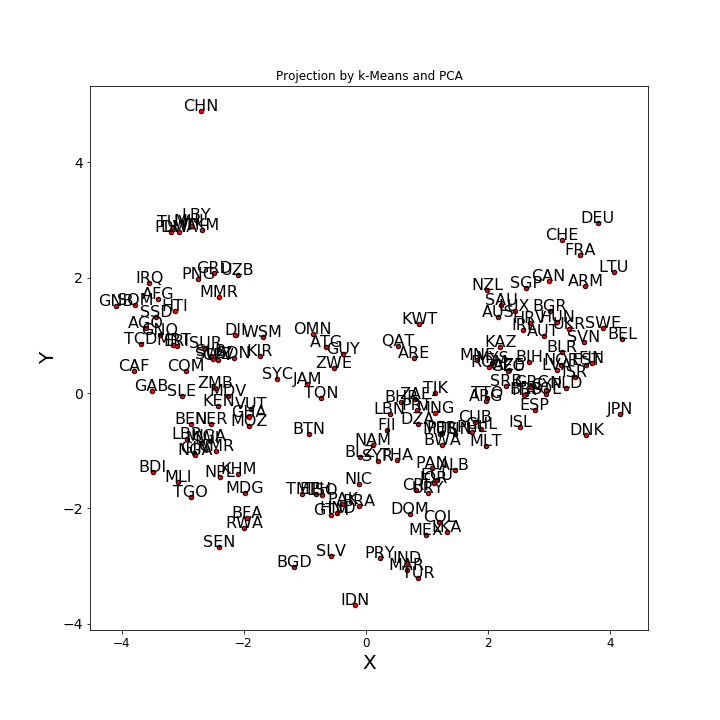

In [25]:
from sklearn.decomposition import PCA

part_data = data[top[0:20]]

data_scaled = preprocessing.scale(part_data)

pca = PCA()
X_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by k-Means and PCA")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center',size=16)



/usr/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


<IPython.core.display.Javascript object>


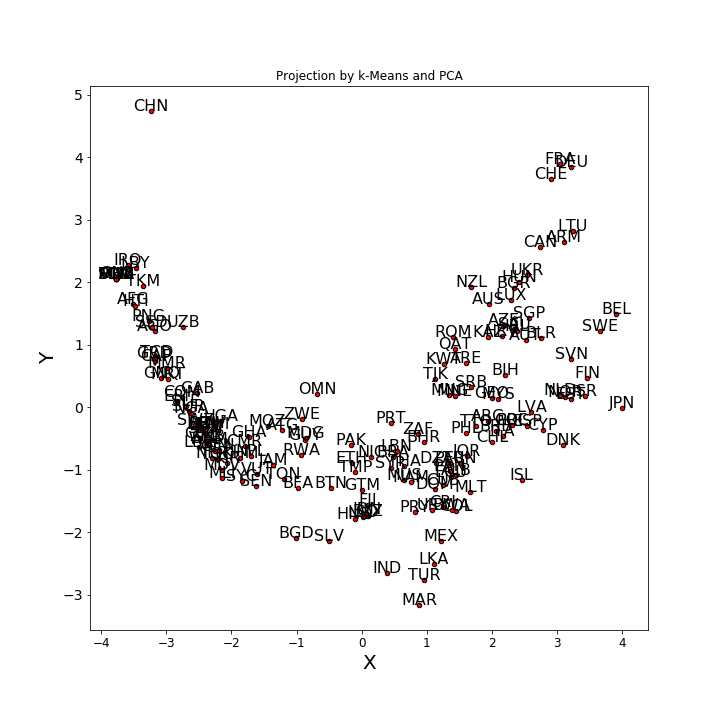

In [26]:
from sklearn.decomposition import PCA

part_data = data[top[:15]]

data_scaled = preprocessing.scale(part_data)

pca = PCA()
X_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by k-Means and PCA")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center',size=16)



<IPython.core.display.Javascript object>


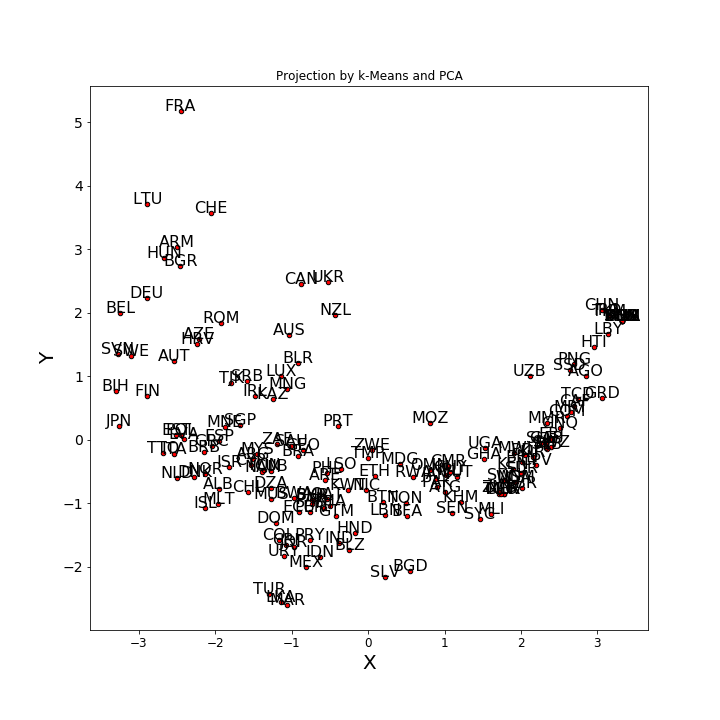

In [27]:
from sklearn.decomposition import PCA

part_data = data[top[:10]]

data_scaled = preprocessing.scale(part_data)

pca = PCA()
X_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by k-Means and PCA")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center',size=16)



<IPython.core.display.Javascript object>


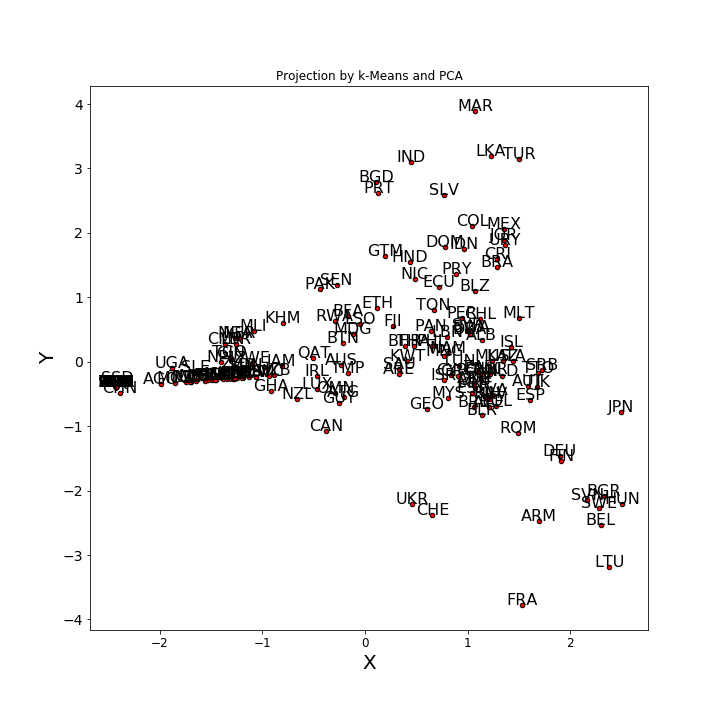

In [28]:
from sklearn.decomposition import PCA

part_data = data[top[:5]]

data_scaled = preprocessing.scale(part_data)

pca = PCA()
X_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by k-Means and PCA")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center',size=16)



/usr/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


<IPython.core.display.Javascript object>


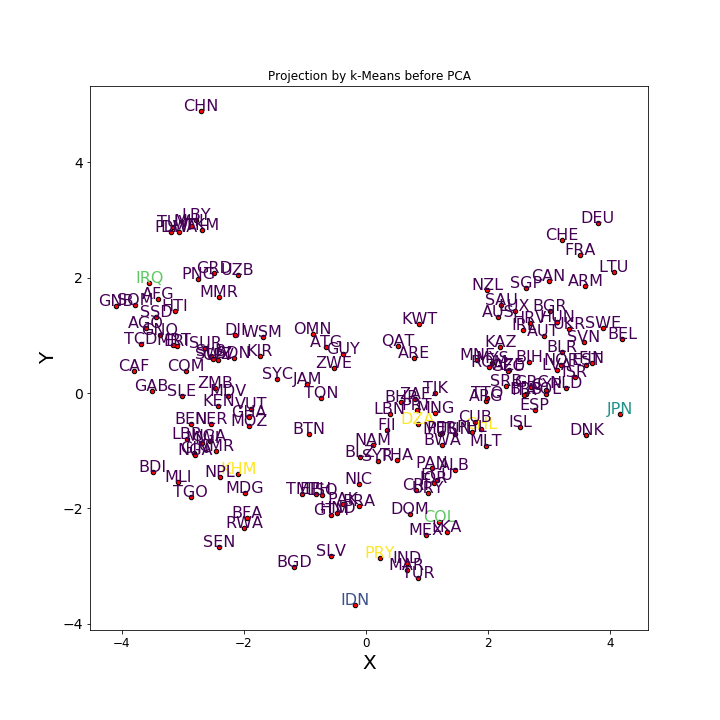

In [112]:
NUMBER_OF_CLASSES = 5

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=NUMBER_OF_CLASSES, init='k-means++', max_iter=5000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data[top[:20]])

color_generator = plt.cm.get_cmap('viridis', NUMBER_OF_CLASSES)

data_scaled = preprocessing.scale(data[top[:20]])

from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by k-Means before PCA")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

/usr/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


<IPython.core.display.Javascript object>


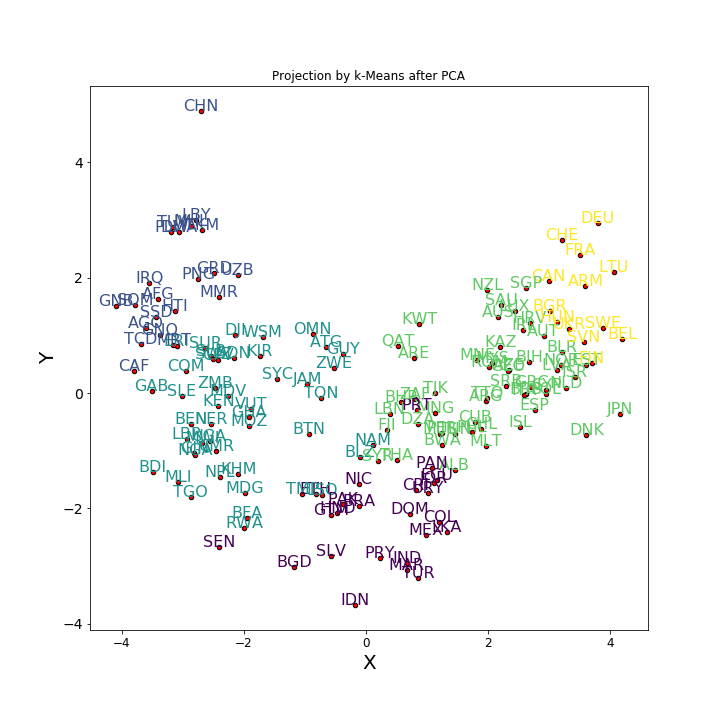

In [113]:
from sklearn.decomposition import PCA

color_generator = plt.cm.get_cmap('viridis', 5)

part_data = data[top[:20]]

data_scaled = preprocessing.scale(part_data)

pca = PCA()
X_pca = pca.fit_transform(data_scaled)

NUMBER_OF_CLASSES = 5

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=NUMBER_OF_CLASSES, init='k-means++', max_iter=5000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by k-Means after PCA")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

/usr/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


<IPython.core.display.Javascript object>


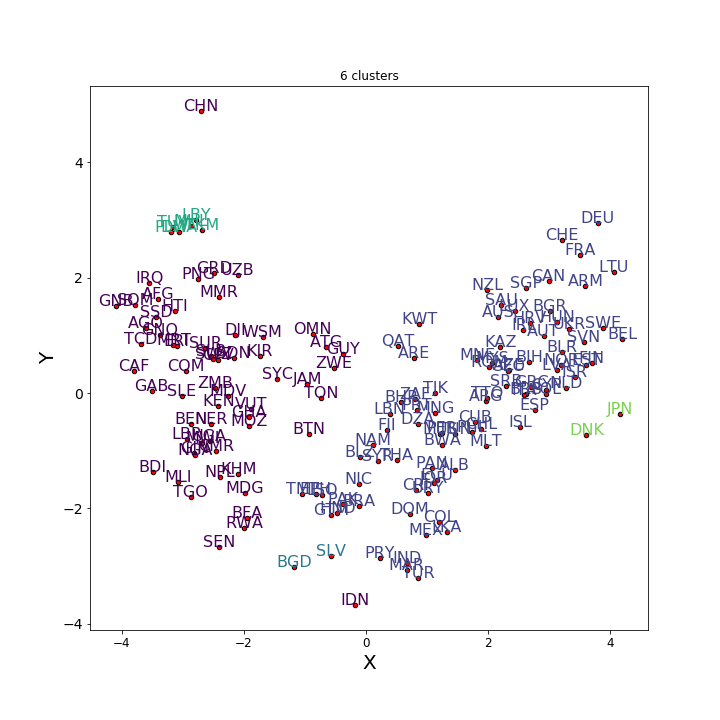

In [128]:
from sklearn.decomposition import PCA

color_generator = plt.cm.get_cmap('viridis', 5)

part_data = data[top[:20]]

data_scaled = preprocessing.scale(part_data)

pca = PCA()
X_pca = pca.fit_transform(data_scaled)

db = DBSCAN(eps=0.7, min_samples=2).fit(X_pca[:,:2])

pred_y = db.labels_
color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

For 5 or 2 top features it looks very similar, so it does not make sense to show the results

In [114]:
from sklearn.cluster import DBSCAN

In [115]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(data[top[:20]])

db = DBSCAN(eps=0.3, min_samples=10).fit(scaled_data)
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

In [116]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(data[top[:20]])

db = DBSCAN(eps=0.7, min_samples=10).fit(scaled_data)
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

In [117]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(data[top[:5]])

db = DBSCAN(eps=0.3, min_samples=10).fit(scaled_data)
db.labels_

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  1, -1,
       -1, -1, -1,  1,  0, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1,  0,  1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  0, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  0, -1,  0,  1, -1, -1,
        1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1,  1,  1, -1,  1, -1])

In [118]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(data[top[:5]])

db = DBSCAN(eps=0.7, min_samples=10).fit(scaled_data)
db.labels_

array([ 0,  2,  1,  1,  1, -1, -1, -1,  1,  1,  2, -1,  2, -1, -1, -1, -1,
        1,  1, -1, -1,  1, -1, -1,  2, -1, -1, -1,  0,  2, -1,  2,  2, -1,
        1,  1, -1,  2,  0,  1, -1, -1, -1,  2, -1,  1, -1, -1, -1, -1,  2,
        1, -1,  2,  0,  2,  1,  0, -1, -1, -1,  1,  0, -1, -1, -1, -1,  0,
        1,  1,  1,  2, -1, -1,  1,  2, -1,  2,  1, -1,  2,  0, -1, -1, -1,
       -1,  1, -1, -1,  2, -1,  0,  2, -1,  2,  1,  1,  2,  2,  1,  2,  1,
        1,  2,  2, -1,  1,  1,  2, -1, -1, -1, -1, -1, -1,  0,  0,  1, -1,
       -1,  2, -1, -1,  1,  2, -1,  1,  2,  2, -1,  0,  1,  0,  2, -1, -1,
        2,  2, -1,  2,  2, -1,  1,  0, -1, -1,  1,  1, -1,  0,  2, -1, -1,
        2,  2,  2, -1,  2, -1])

<IPython.core.display.Javascript object>


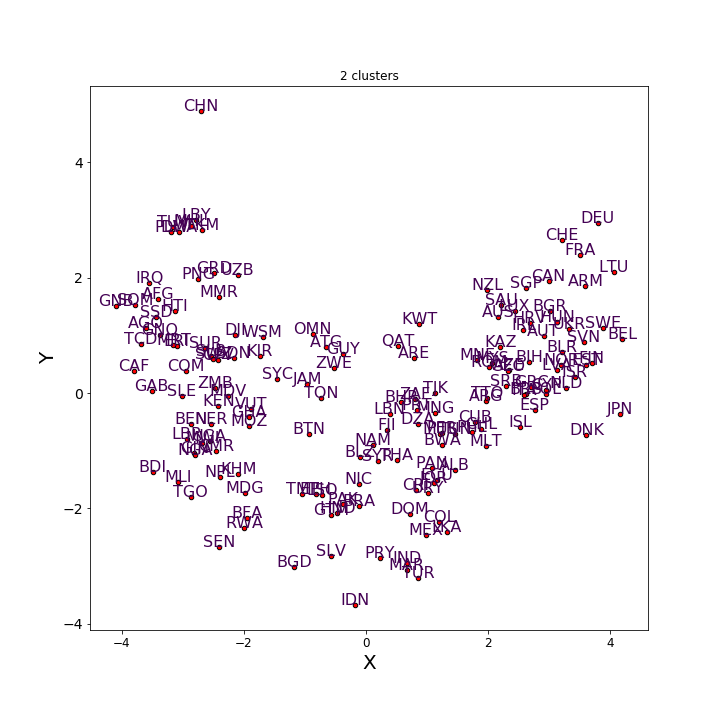

In [124]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

db = DBSCAN(eps=0.7, min_samples=2).fit(scaled_data)

pred_y = db.labels_
color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


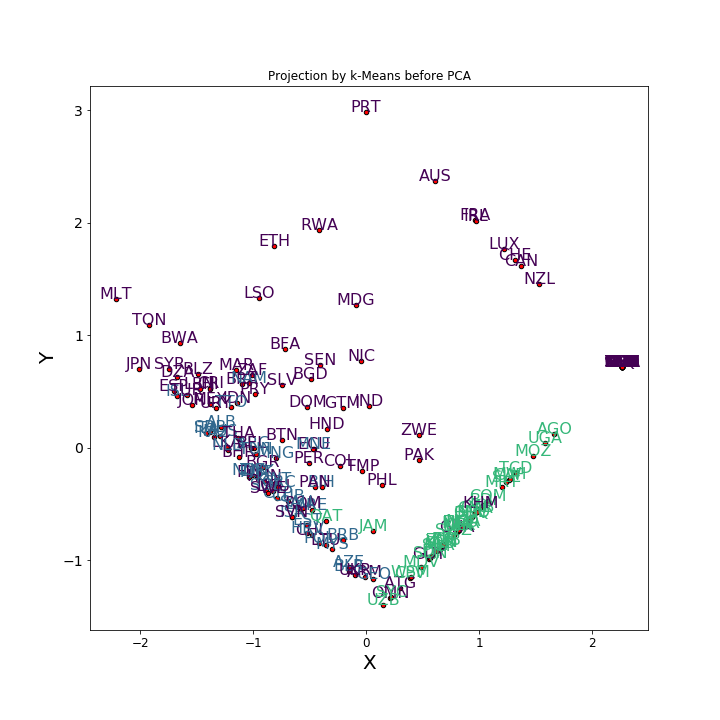

In [120]:
from sklearn.decomposition import PCA


kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=5000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data[top[:2]])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]

part_data = data[top[:2]]

data_scaled = preprocessing.scale(part_data)

pca = PCA()
X_pca = pca.fit_transform(data_scaled)

plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title("Projection by k-Means before PCA")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


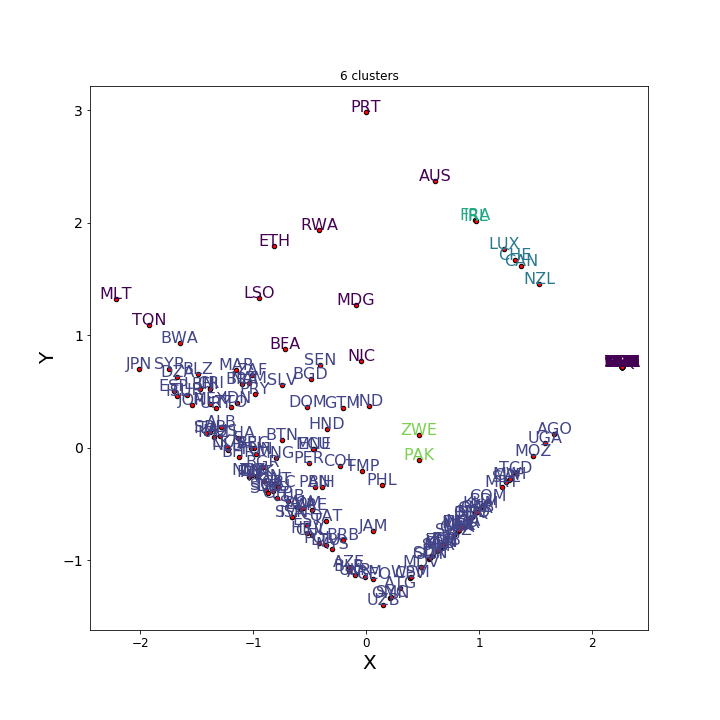

In [121]:
from sklearn.decomposition import PCA



scaled_data = StandardScaler().fit_transform(data[top[:2]])

db = DBSCAN(eps=0.3, min_samples=2).fit(scaled_data)

pred_y = db.labels_
color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))


plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


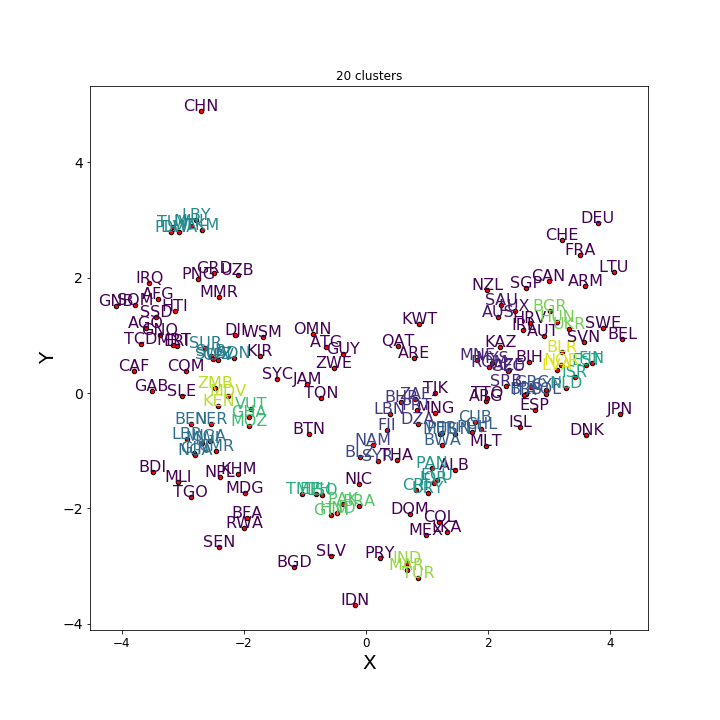

In [122]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)

db = DBSCAN(eps=0.3, min_samples=3).fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

In [91]:
pred_y

array([-1,  0, -1, -1, -1, -1, -1,  1, -1,  2, -1, -1,  7, -1, -1, 15,  3,
       -1, 18,  4, 14,  5, -1,  6, -1, -1, -1,  6, -1,  7, -1, -1,  8, 10,
        6,  5, -1, -1,  9, -1, -1,  3, 10,  0, -1, 11, 12, 11,  3, -1, -1,
        2, 13,  7, -1,  0,  5, -1, 14, -1, 14, -1, -1, 15, -1, 16, -1, -1,
       -1, 11,  5, -1, 10, -1, -1, 17, -1, -1, -1,  3,  7,  9, -1, 12, -1,
        1, 18, 16, -1, 17, -1,  9, -1, -1, -1,  2, -1, 13,  0,  6,  7,  2,
        4,  7,  7, -1, 11, 18, -1, -1, -1, 14, 10,  6,  6,  9, -1,  5,  3,
       -1, -1,  2, -1,  1,  8, -1, -1,  8, -1, -1, -1,  2,  0,  8, -1, -1,
        8, -1,  4,  0, -1, -1, -1,  9, 12, -1, -1,  6, 16,  9,  7, 15, 10,
       -1, 13, -1,  3, 17, -1])

<IPython.core.display.Javascript object>


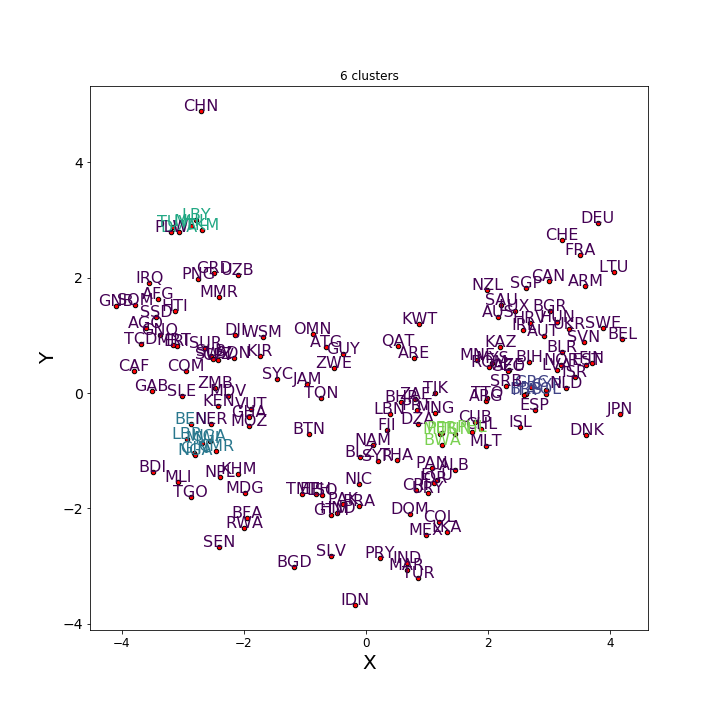

In [125]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)

db = DBSCAN(eps=0.3, min_samples=5).fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


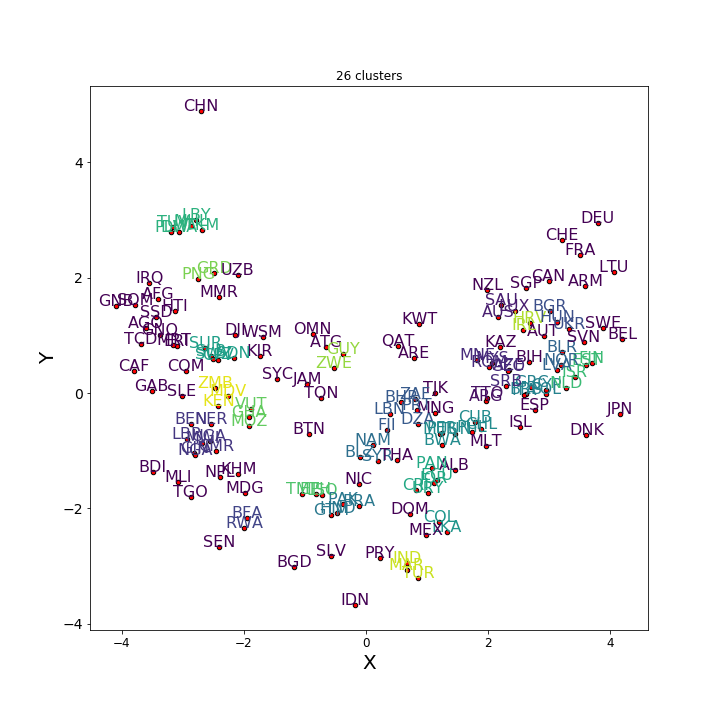

In [129]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)

db = DBSCAN(eps=0.3, min_samples=2).fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


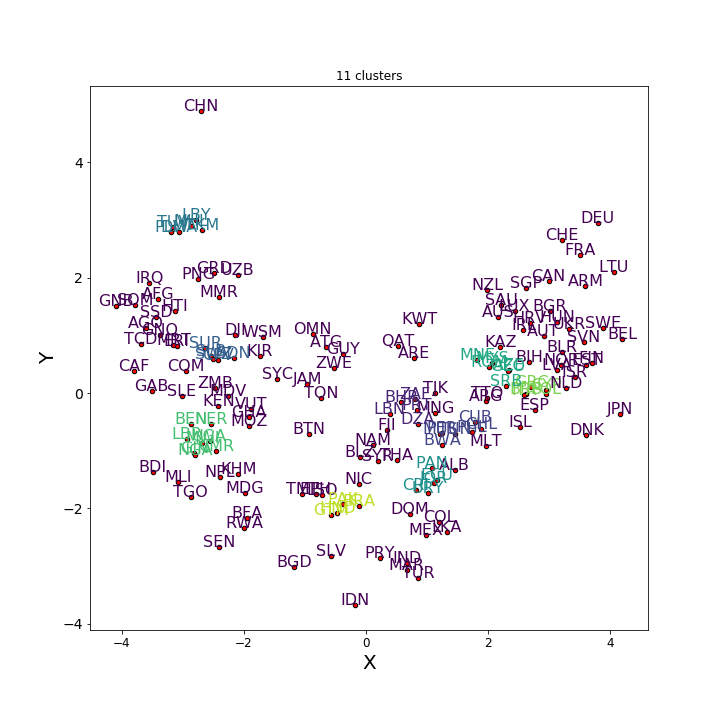

In [130]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)

db = DBSCAN(eps=0.3, min_samples=4).fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


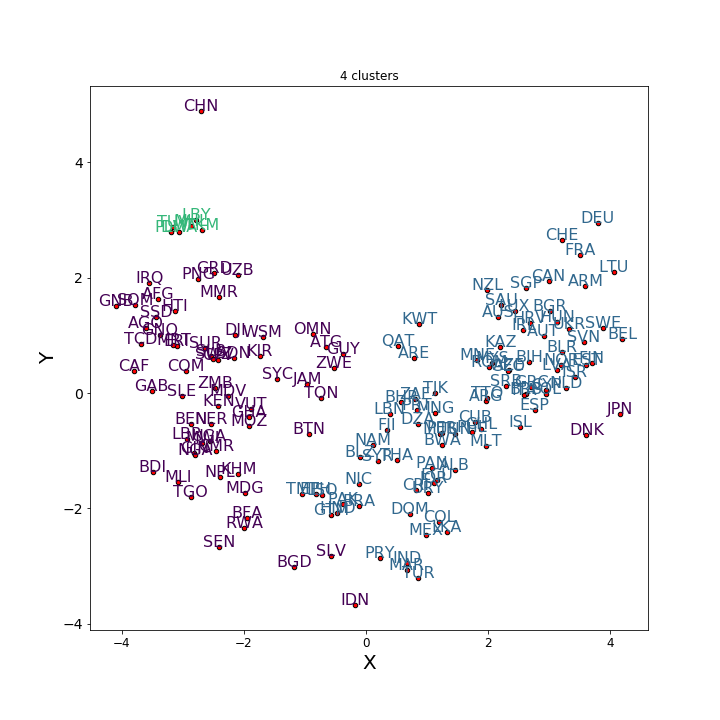

In [131]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)

db = DBSCAN(eps=0.7, min_samples=4).fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


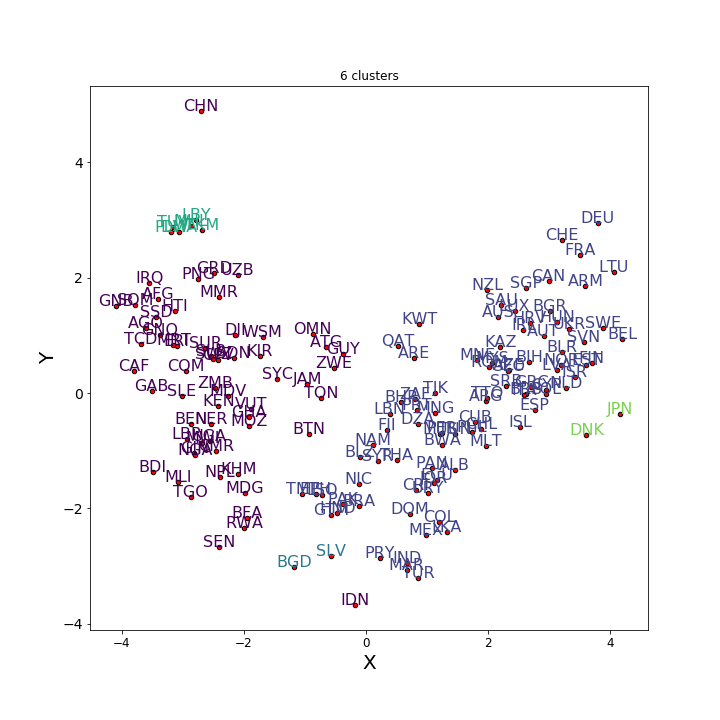

In [133]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)

db = DBSCAN(eps=0.7, min_samples=2).fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


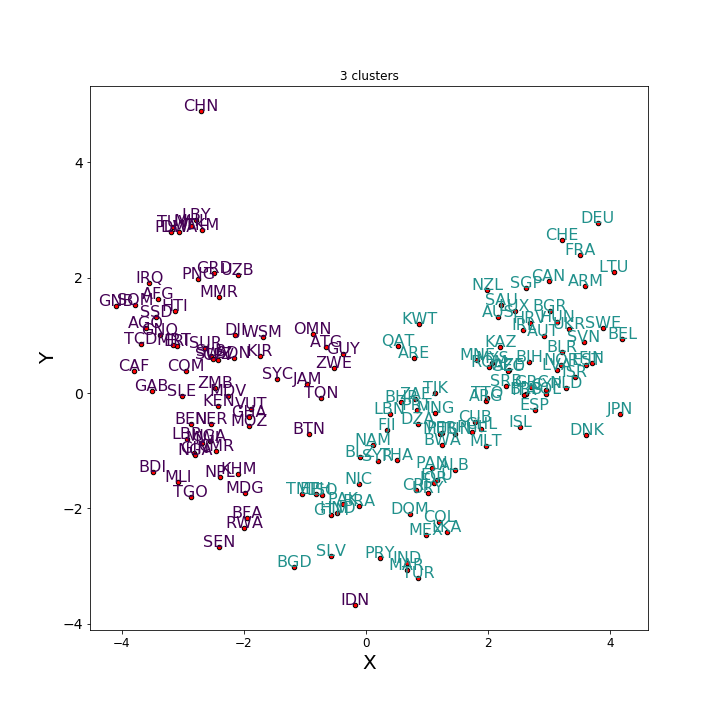

In [137]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)

db = DBSCAN(eps=0.9, min_samples=2).fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


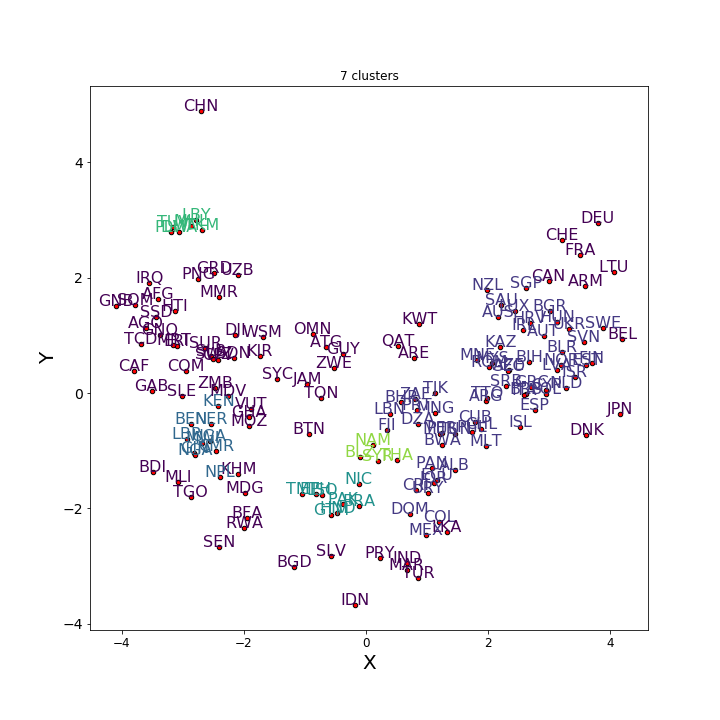

In [143]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)
#{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’}
db = DBSCAN(eps=0.5, min_samples=5, algorithm='kd_tree').fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


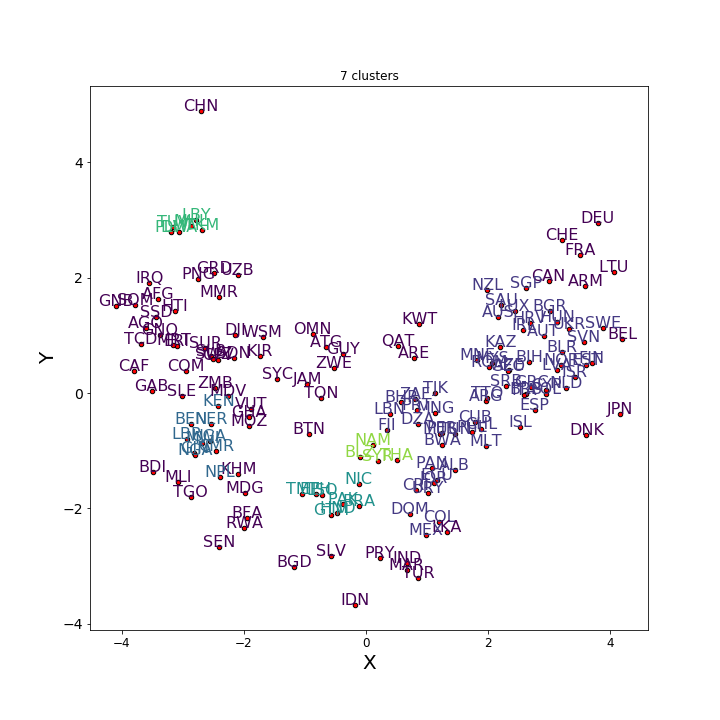

In [144]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)
#{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’}
db = DBSCAN(eps=0.5, min_samples=5, algorithm='ball_tree').fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


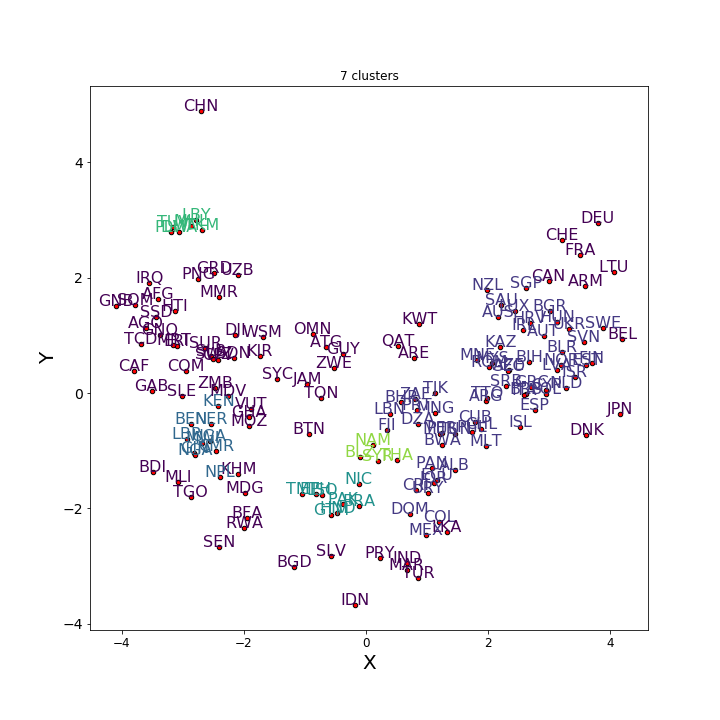

In [145]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)
#{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’}
db = DBSCAN(eps=0.5, min_samples=5, leaf_size=100).fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


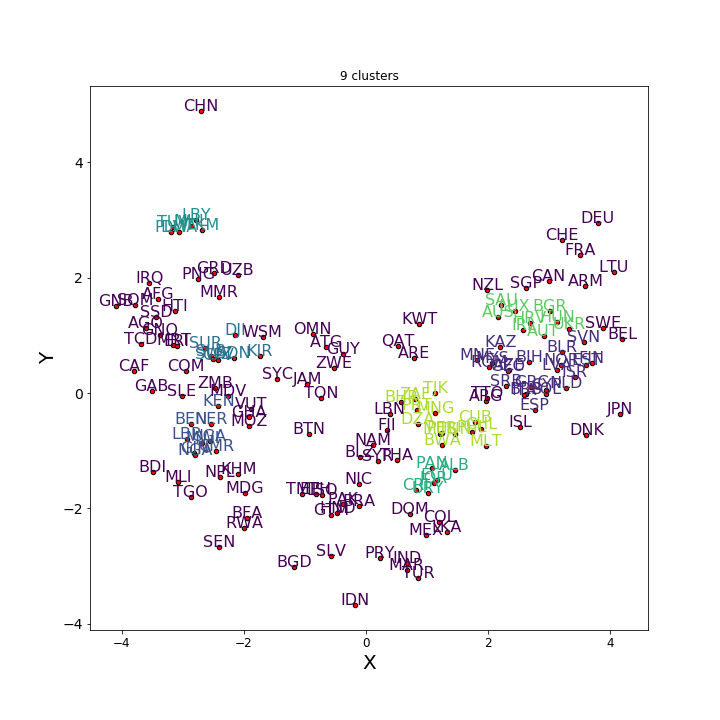

In [146]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)

# [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’].
db = DBSCAN(eps=0.5, min_samples=5, metric='manhattan').fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


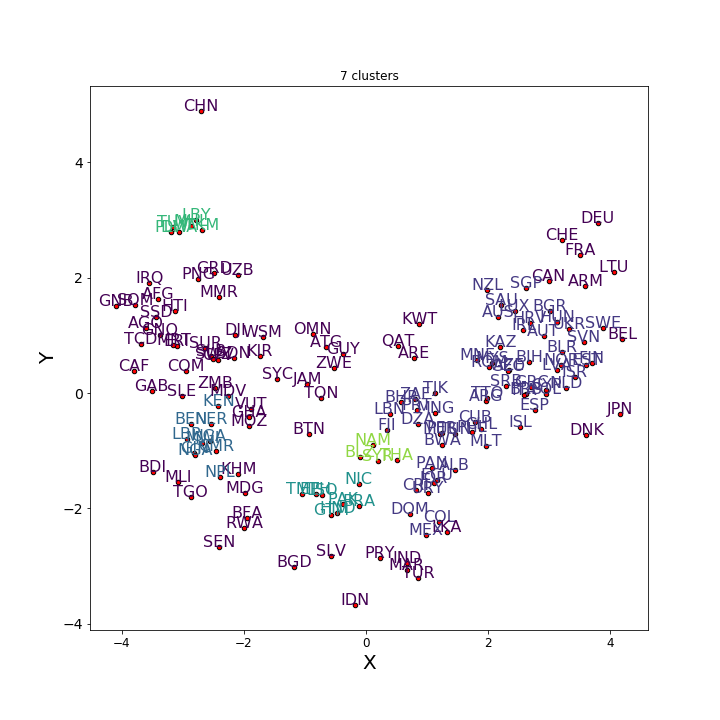

In [147]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)

# [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’].
db = DBSCAN(eps=0.5, min_samples=5, metric='euclidean').fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


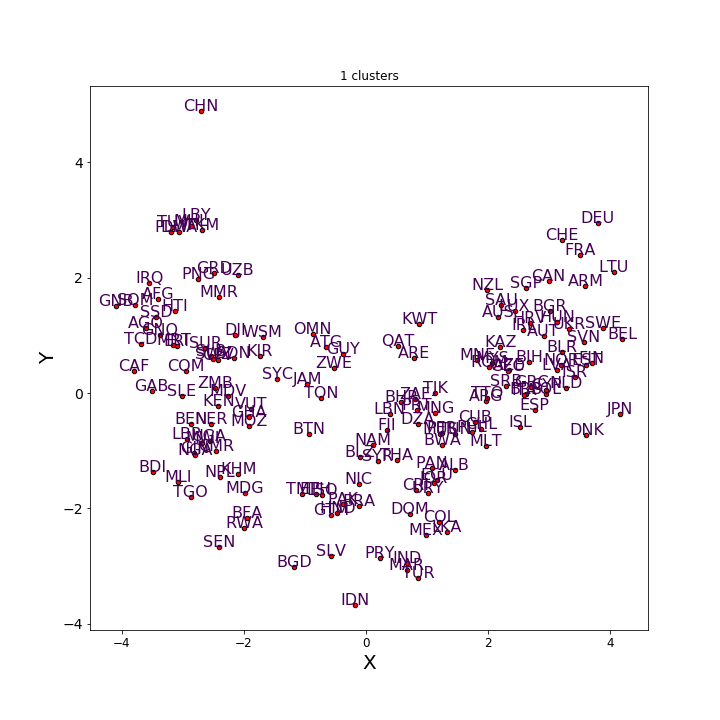

In [148]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)

# [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’].
db = DBSCAN(eps=0.5, min_samples=5, metric='cosine').fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


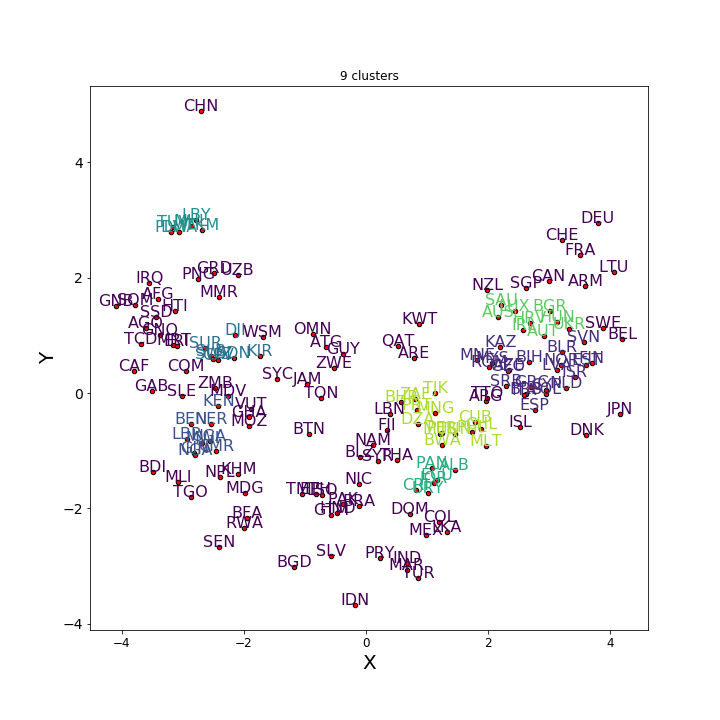

In [149]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)

# [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’].
db = DBSCAN(eps=0.5, min_samples=5, metric='cityblock').fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


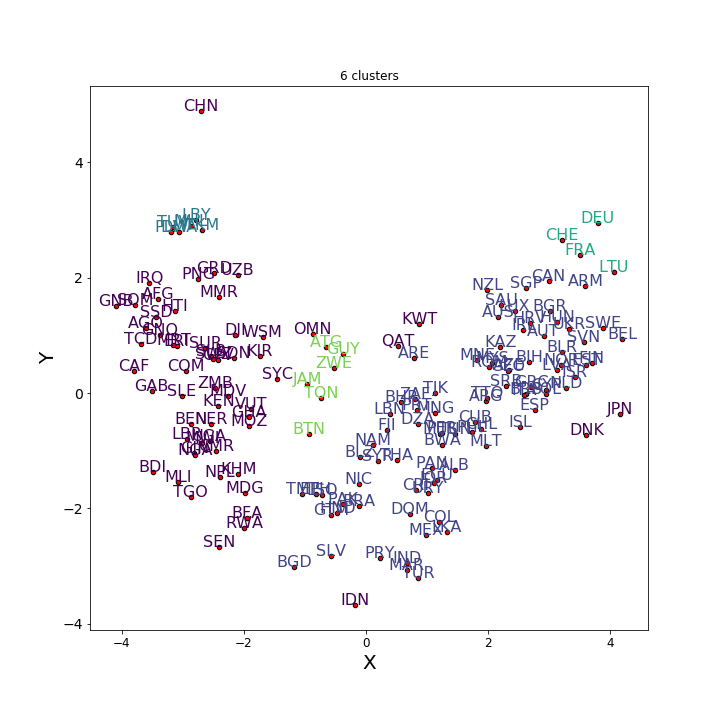

In [150]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)

# [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’].
db = DBSCAN(eps=0.9, min_samples=5, metric='manhattan').fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


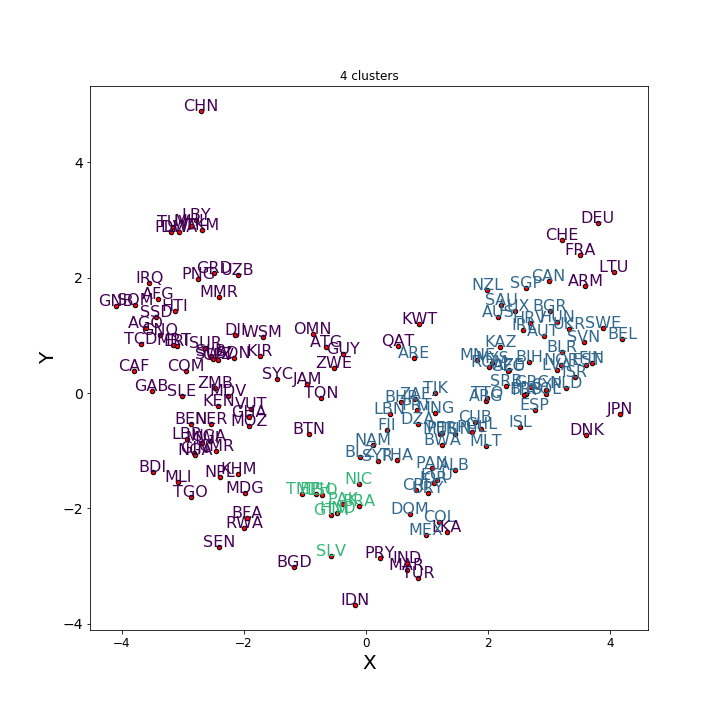

In [151]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)

# [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’].
db = DBSCAN(eps=0.9, min_samples=8, metric='manhattan').fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)

<IPython.core.display.Javascript object>


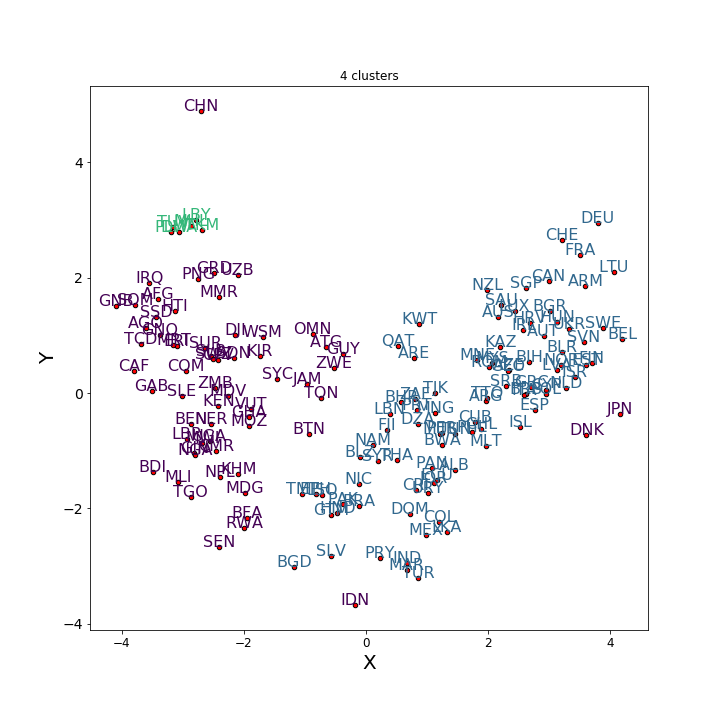

In [152]:
from sklearn.decomposition import PCA


scaled_data = StandardScaler().fit_transform(data[top[:20]])

X_pca = PCA().fit_transform(scaled_data)

# [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’].
db = DBSCAN(eps=0.9, min_samples=3, metric='manhattan').fit(X_pca[:,:2])

pred_y = db.labels_

color_generator = plt.cm.get_cmap('viridis', len(np.unique(pred_y)))

plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.title("Visuzalization of Dataset",fontsize=20)

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x, y, c="red", s=20, edgecolor='k')
plt.title(str(len(np.unique(pred_y))) + " clusters")
for i, txt in enumerate(countries):
    plt.annotate(txt, (x[i], y[i]), ha='center', c=color_generator(pred_y[i]), size=16)